In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [6]:
data = pd.read_csv('진짜가중평균.csv',engine='python',encoding='utf-8-sig')
data1 = pd.read_csv('직전년도.csv',engine='python',encoding='utf-8-sig')
data2 = pd.read_csv('프로기록있는선수들통과.csv') # 대회년도 평균내서 가져오기 위한 용도
key = pd.read_csv('afterdrop.csv',engine='python',encoding='utf-8-sig')

In [7]:
data2 = data2.reset_index(drop=True)

In [8]:
year = data2.groupby(['선수명','대학교']).mean()

In [9]:
data5 =pd.merge(data,year['대회년도'],how='left',on='선수명').dropna(axis=0).reset_index(drop=True)

In [10]:
data3 =pd.merge(data5,data1[['선수명','키','EFF']],how='left',on='선수명').dropna(axis=0).reset_index(drop=True)

In [11]:
data3 # 대회년도, 키, 4년 max eff추가

Unnamed: 0  선수명     대학교   경기수      전체 출전시간  득점 전체  득점 평균  2점슛 성공  2점슛 시도  \
0             1  강병진   건국대학교   3.6   421.785000   10.3    2.2     3.2     8.2   
1             3  강상재   고려대학교  18.9  4205.098333  233.0   22.9    90.9   162.4   
2             4  강우형   경희대학교   6.0  1391.380000   32.5    4.0    11.0    13.6   
3             6  강은식   한양대학교   4.6   896.576667   56.3   11.9    22.1    36.6   
4             7  강준구   한양대학교   5.1  1094.250000   47.1    8.6     7.2    13.9   
..          ...  ...     ...   ...          ...    ...    ...     ...     ...   
353         503  홍경기   고려대학교   4.0  1365.050000   51.0   12.0     8.0    14.0   
354         504  홍석민   동국대학교  18.7  2765.428333   90.2    9.7    27.4    58.0   
355         505  홍성헌  성균관대학교   4.1  1235.015000   59.3   14.3    22.8    54.2   
356         506  홍수화   한양대학교   4.3  1148.940000   55.5   12.5    15.0    26.6   
357         508  황진원   중앙대학교   4.0  1365.716667   57.9   14.3    17.0    25.4   

     2점슛 성공률  ...  굿디펜스   속공  FBF   턴오버  팀 리바운드  팀 턴오버   년수         대회년도  \
0      4.030  ...   1.6  0.0  0.0   4.0     0.0    0.0  3.0  2009.000000   
1     10.807  ...   9.3  8.9  2.6  28.4     0.8    0.0  4.0  2014.500000   
2      7.320  ...   5.4  0.0  0.0   7.5     0.0    0.0  3.0  2004.333333   
3      5.998  ...   8.9  0.0  0.0   8.0     0.0    0.0  3.0  2002.666667   
4      4.300  ...   2.1  0.0  0.0   7.8     0.0    0.0  3.0  2000.000000   
..       ...  ...   ...  ...  ...   ...     ...    ...  ...          ...   
353    5.710  ...   1.0  0.0  0.0  10.0     0.0    0.0  1.0  2010.000000   
354   10.248  ...   2.8  1.1  0.6  12.9     1.6    0.7  4.0  2015.333333   
355    4.430  ...   7.2  0.0  0.0   6.3     0.0    0.0  3.0  2005.000000   
356    5.464  ...   3.5  0.0  0.0  12.8     0.0    0.0  4.0  2007.500000   
357    6.817  ...   3.2  0.3  0.0  11.6     0.0    0.0  2.0  1999.500000   

         키    EFF  
0    193.0   81.0  
1    200.0  807.0  
2    191.0   44.0  
3    198.0   90.0  
4    185.0    8.0  
..     ...    ...  
353  184.0  362.0  
354  197.0    2.0  
355  195.0   -1.0  
356  194.5  333.0  
357  188.0  956.0  

[358 rows x 39 columns]

In [12]:
data3 = data3.drop(['Unnamed: 0'], axis=1)

In [13]:
final = (data3.drop_duplicates(['선수명'])).reset_index(drop=True)

In [14]:
final #최종 데이터 프레임

선수명     대학교   경기수      전체 출전시간  득점 전체  득점 평균  2점슛 성공  2점슛 시도  2점슛 성공률  \
0    강병진   건국대학교   3.6   421.785000   10.3    2.2     3.2     8.2    4.030   
1    강상재   고려대학교  18.9  4205.098333  233.0   22.9    90.9   162.4   10.807   
2    강우형   경희대학교   6.0  1391.380000   32.5    4.0    11.0    13.6    7.320   
3    강은식   한양대학교   4.6   896.576667   56.3   11.9    22.1    36.6    5.998   
4    강준구   한양대학교   5.1  1094.250000   47.1    8.6     7.2    13.9    4.300   
..   ...     ...   ...          ...    ...    ...     ...     ...      ...   
326  홍경기   고려대학교   4.0  1365.050000   51.0   12.0     8.0    14.0    5.710   
327  홍석민   동국대학교  18.7  2765.428333   90.2    9.7    27.4    58.0   10.248   
328  홍성헌  성균관대학교   4.1  1235.015000   59.3   14.3    22.8    54.2    4.430   
329  홍수화   한양대학교   4.3  1148.940000   55.5   12.5    15.0    26.6    5.464   
330  황진원   중앙대학교   4.0  1365.716667   57.9   14.3    17.0    25.4    6.817   

     3점슛 성공  ...  굿디펜스   속공  FBF   턴오버  팀 리바운드  팀 턴오버   년수         대회년도  \
0       1.2  ...   1.6  0.0  0.0   4.0     0.0    0.0  3.0  2009.000000   
1      10.4  ...   9.3  8.9  2.6  28.4     0.8    0.0  4.0  2014.500000   
2       2.5  ...   5.4  0.0  0.0   7.5     0.0    0.0  3.0  2004.333333   
3       0.3  ...   8.9  0.0  0.0   8.0     0.0    0.0  3.0  2002.666667   
4       9.1  ...   2.1  0.0  0.0   7.8     0.0    0.0  3.0  2000.000000   
..      ...  ...   ...  ...  ...   ...     ...    ...  ...          ...   
326    10.0  ...   1.0  0.0  0.0  10.0     0.0    0.0  1.0  2010.000000   
327    11.1  ...   2.8  1.1  0.6  12.9     1.6    0.7  4.0  2015.333333   
328     0.0  ...   7.2  0.0  0.0   6.3     0.0    0.0  3.0  2005.000000   
329     5.8  ...   3.5  0.0  0.0  12.8     0.0    0.0  4.0  2007.500000   
330     3.2  ...   3.2  0.3  0.0  11.6     0.0    0.0  2.0  1999.500000   

         키    EFF  
0    193.0   81.0  
1    200.0  807.0  
2    191.0   44.0  
3    198.0   90.0  
4    185.0    8.0  
..     ...    ...  
326  184.0  362.0  
327  197.0    2.0  
328  195.0   -1.0  
329  194.5  333.0  
330  188.0  956.0  

[331 rows x 38 columns]

In [15]:
labels_total = ['-100','101-200','201-300','301-400','401-500','501-600','601-700','more than 700']
ratio_total = [0]*len(labels_total)
for i in range(len(final['EFF'])):
    if final['EFF'][i] <=100:
        ratio_total[0]+=1
    elif final['EFF'][i] <=200 and final['EFF'][i] >=101:
        ratio_total[1]+=1
    elif final['EFF'][i] <=300 and final['EFF'][i] >=201:
        ratio_total[2]+=1
    elif final['EFF'][i] <=400 and final['EFF'][i] >=301:
        ratio_total[3]+=1
    elif final['EFF'][i] <=500 and final['EFF'][i] >=401:
        ratio_total[4]+=1
    elif final['EFF'][i] <=600 and final['EFF'][i] >=501:
        ratio_total[5]+=1
    elif final['EFF'][i] <=700 and final['EFF'][i] >=601:
        ratio_total[6]+=1
    else:
        ratio_total[7]+=1

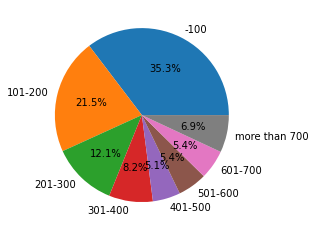

In [16]:
import matplotlib.pyplot as plt


plt.pie(ratio_total, labels=labels_total, autopct='%.1f%%')
plt.show()

In [17]:
final_under2007 = (final.loc[(final['대회년도'] >= 2015)]).reset_index(drop=True)

In [18]:
final_under2007 

선수명     대학교    경기수      전체 출전시간  득점 전체  득점 평균  2점슛 성공  2점슛 시도  2점슛 성공률  \
0   곽동기   상명대학교  19.20  4611.265000  227.8  19.50    90.9   168.1   8.1640   
1   곽정훈   상명대학교  13.80  4011.751667  215.5  34.20    52.8    96.2  11.6260   
2   권성진   경희대학교  20.10  4257.543333  155.5  14.80    28.2    65.2   8.2450   
3   권시현   단국대학교  21.10  6670.516667  348.8  30.80    92.9   196.5   9.7760   
4   권혁준   경희대학교  17.30  5338.423333  230.1  24.30    67.9   141.6   9.8240   
..  ...     ...    ...          ...    ...    ...     ...     ...      ...   
69  최우연  성균관대학교  19.00  2679.258333  138.6  17.10    59.3   100.8  13.1770   
70  최진광   건국대학교  16.70  3533.711667  244.3  24.50    52.2   123.9   7.2590   
71  하도현   단국대학교  17.55  5409.235000  316.9  31.25   119.0   191.5  11.3305   
72  한승희   연세대학교  12.90  2733.401667  164.3  26.10    59.8   104.6  11.9180   
73  홍석민   동국대학교  18.70  2765.428333   90.2   9.70    27.4    58.0  10.2480   

    3점슛 성공  ...   굿디펜스    속공   FBF    턴오버  팀 리바운드  팀 턴오버   년수         대회년도  \
0     4.00  ...   1.50   2.3   0.7  47.50    17.7   4.70  4.0  2017.500000   
1    27.60  ...   1.70  18.7  10.1  22.80     4.4   0.70  4.0  2018.500000   
2    29.50  ...   5.00   9.5   5.1  26.30    17.4   0.70  4.0  2016.500000   
3    38.70  ...  11.80  27.3  14.2  48.90    12.3   6.70  4.0  2016.500000   
4    20.50  ...   3.90  21.9  11.7  38.40     9.7   2.30  4.0  2017.500000   
..     ...  ...    ...   ...   ...    ...     ...    ...  ...          ...   
69    3.90  ...  14.40   2.9   1.4  27.20     6.0   0.30  4.0  2015.500000   
70   38.10  ...   4.80  19.2  11.1  56.00    17.6   1.80  4.0  2017.428571   
71    7.65  ...  11.45  20.0   5.6  42.55    14.7   2.65  5.0  2015.000000   
72    5.00  ...   0.80  11.2   1.9  23.20     5.1   0.80  4.0  2018.500000   
73   11.10  ...   2.80   1.1   0.6  12.90     1.6   0.70  4.0  2015.333333   

        키    EFF  
0   193.0  185.0  
1   187.0   53.0  
2   180.0  125.0  
3   184.0  297.0  
4   180.0  145.0  
..    ...    ...  
69  198.0   40.0  
70  175.7   87.0  
71  197.1  137.0  
72  196.0   64.0  
73  197.0    2.0  

[74 rows x 38 columns]

In [19]:
labels_under = ['-100','101-200','201-300','301-400','401-500','501-600','601-700','more than 700']
ratio_under = [0]*len(labels_under)
for i in range(len(final_under2007 ['EFF'])):
    if final_under2007['EFF'][i] <=100:
        ratio_under[0]+=1
    elif final_under2007['EFF'][i] <=200 and final_under2007['EFF'][i] >=101:
        ratio_under[1]+=1
    elif final_under2007['EFF'][i] <=300 and final_under2007['EFF'][i] >=201:
        ratio_under[2]+=1
    elif final_under2007['EFF'][i] <=400 and final_under2007['EFF'][i] >=301:
        ratio_under[3]+=1
    elif final_under2007['EFF'][i] <=500 and final_under2007['EFF'][i] >=401:
        ratio_under[4]+=1
    elif final_under2007['EFF'][i] <=600 and final_under2007['EFF'][i] >=501:
        ratio_under[5]+=1
    elif final_under2007['EFF'][i] <=700 and final_under2007['EFF'][i] >=601:
        ratio_under[6]+=1
    else:
        ratio_under[7]+=1

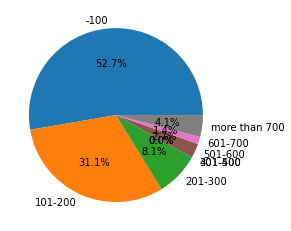

In [20]:
plt.pie(ratio_under, labels=labels_under, autopct='%.1f%%')
plt.show()

In [21]:
final_under2003 = (final.loc[(final['대회년도'] > 2005)]).reset_index(drop=True)

In [22]:
final_under2003

선수명    대학교   경기수      전체 출전시간  득점 전체  득점 평균  2점슛 성공  2점슛 시도  2점슛 성공률  \
0    강병진  건국대학교   3.6   421.785000   10.3    2.2     3.2     8.2    4.030   
1    강상재  고려대학교  18.9  4205.098333  233.0   22.9    90.9   162.4   10.807   
2    강호연  명지대학교  16.6  2634.055000  107.6   13.8    13.9    33.6    7.957   
3    곽동기  상명대학교  19.2  4611.265000  227.8   19.5    90.9   168.1    8.164   
4    곽정훈  상명대학교  13.8  4011.751667  215.5   34.2    52.8    96.2   11.626   
..   ...    ...   ...          ...    ...    ...     ...     ...      ...   
228  허일영  건국대학교   5.1  1613.453333   89.5   16.2    18.1    38.7    4.245   
229  허진성  건국대학교   5.3  1819.161667   43.2    7.4    11.5    27.0    4.582   
230  홍경기  고려대학교   4.0  1365.050000   51.0   12.0     8.0    14.0    5.710   
231  홍석민  동국대학교  18.7  2765.428333   90.2    9.7    27.4    58.0   10.248   
232  홍수화  한양대학교   4.3  1148.940000   55.5   12.5    15.0    26.6    5.464   

     3점슛 성공  ...  굿디펜스    속공   FBF   턴오버  팀 리바운드  팀 턴오버   년수         대회년도  \
0       1.2  ...   1.6   0.0   0.0   4.0     0.0    0.0  3.0  2009.000000   
1      10.4  ...   9.3   8.9   2.6  28.4     0.8    0.0  4.0  2014.500000   
2      25.3  ...   6.4   4.2   1.7  16.3    11.4    3.7  4.0  2013.500000   
3       4.0  ...   1.5   2.3   0.7  47.5    17.7    4.7  4.0  2017.500000   
4      27.6  ...   1.7  18.7  10.1  22.8     4.4    0.7  4.0  2018.500000   
..      ...  ...   ...   ...   ...   ...     ...    ...  ...          ...   
228    14.7  ...   4.8   0.0   0.0   6.9     0.0    0.0  4.0  2006.500000   
229     4.8  ...   5.2   0.0   0.0   9.3     0.0    0.0  4.0  2006.500000   
230    10.0  ...   1.0   0.0   0.0  10.0     0.0    0.0  1.0  2010.000000   
231    11.1  ...   2.8   1.1   0.6  12.9     1.6    0.7  4.0  2015.333333   
232     5.8  ...   3.5   0.0   0.0  12.8     0.0    0.0  4.0  2007.500000   

         키    EFF  
0    193.0   81.0  
1    200.0  807.0  
2    188.0  102.0  
3    193.0  185.0  
4    187.0   53.0  
..     ...    ...  
228  196.0  648.0  
229  182.0  149.0  
230  184.0  362.0  
231  197.0    2.0  
232  194.5  333.0  

[233 rows x 38 columns]

In [23]:
df_x = final_under2003.drop(['EFF','년수', '선수명','대학교','대회년도'],axis=1)
df_y = final_under2003['EFF']

In [24]:
maxr2 = 0
maxalpha = 0
maxrans = 0
maxcoef = []
for i in range(1000):
    for j in range(100):
        x_train, x_valid, y_train, y_valid = train_test_split(df_x, df_y, random_state = j, test_size = 0.30)
        k = i/10.0
        reg_Lasso = Lasso(alpha = k)
        reg_Lasso.fit(x_train, y_train)
        y_pred_Lasso = reg_Lasso.predict(x_valid)
        r2orgLasso = r2_score(y_valid,y_pred_Lasso)
        if(r2orgLasso>maxr2):
            maxrans = j
            maxr2 = r2orgLasso
            maxalpha = k
            maxcoef = reg_Lasso.coef_.nonzero()[0]
print('alpha is',maxalpha,'and random_state is',maxrans,'and rsquare is', maxr2)
print('and variables are',maxcoef)

/var/folders/x6/nclkdm5d2s99l3x9scdkj6m00000gn/T/ipykernel_5246/1343833188.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg_Lasso.fit(x_train, y_train)
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2040653.815051555, tolerance: 768.081527607362
  model = cd_fast.enet_coordinate_descent(
/var/folders/x6/nclkdm5d2s99l3x9scdkj6m00000gn/T/ipykernel_5246/1343833188.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegressi

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2471124.1065540365, tolerance: 962.8002748466257
  model = cd_fast.enet_coordinate_descent(
/var/folders/x6/nclkdm5d2s99l3x9scdkj6m00000gn/T/ipykernel_5246/1343833188.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg_Lasso.fit(x_train, y_train)
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase t

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1824055.944730898, tolerance: 690.6543042944786
  model = cd_fast.enet_coordinate_descent(
/var/folders/x6/nclkdm5d2s99l3x9scdkj6m00000gn/T/ipykernel_5246/1343833188.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg_Lasso.fit(x_train, y_train)
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase th

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2315937.3774377997, tolerance: 877.887801226994
  model = cd_fast.enet_coordinate_descent(
/var/folders/x6/nclkdm5d2s99l3x9scdkj6m00000gn/T/ipykernel_5246/1343833188.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg_Lasso.fit(x_train, y_train)
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase th

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 935440.5613110135, tolerance: 869.8975141104295
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1761885.8955616076, tolerance: 818.7771607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 942128.2974444854, tolerance: 825.3115779141106
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1965969.6476894845, tolerance: 878.9112441717792
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56944.34313699696, tolerance: 850.1753361963191
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49186.40901329601, tolerance: 749.2544662576686
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 262996.2630754858, tolerance: 898.666354601227
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 155081.8901803377, tolerance: 858.9809141104295
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1374623.3784967156, tolerance: 912.4655840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1324871.033633586, tolerance: 868.575019631902
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 397571.639040092, tolerance: 806.7412049079754
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 988531.8698718662, tolerance: 810.675391411043
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-pa

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 342433.2750209132, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1702042.9089420598, tolerance: 896.7292625766872
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1165916.098148629, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60402.626627962105, tolerance: 870.8640257668714
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54951.00612562662, tolerance: 849.5844662576689
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62816.485015076585, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1274550.6513448523, tolerance: 941.4505607361962
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61231.71895227954, tolerance: 922.2732944785276
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1462446.4612019008, tolerance: 881.6373079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1038833.8630094391, tolerance: 878.4536122699386
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69145.3971283501, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93050.87288514059, tolerance: 1017.891071165644
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 968435.1375665802, tolerance: 896.502171779141
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23022.290867082775, tolerance: 887.2346944785279
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106352.31937376037, tolerance: 914.3778110429449
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1005806.7287903174, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78006.49329369795, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61156.971170442645, tolerance: 912.8392797546013
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27861.570611747913, tolerance: 856.0200012269938
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1128053.9485747542, tolerance: 962.8002748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69962.12566025881, tolerance: 856.6859644171781
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56646.93503835192, tolerance: 690.6543042944786
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73932.67185177328, tolerance: 774.2188490797545
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48814.78473521676, tolerance: 886.3066625766872
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82346.01415302511, tolerance: 945.9581644171778
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72390.81869824603, tolerance: 877.887801226994
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84146.97612629365, tolerance: 864.1847030674847
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71787.39690093603, tolerance: 863.3428294478531
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80042.92557300208, tolerance: 850.7520404907975
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 970153.5466082338, tolerance: 869.8975141104295
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72768.24479857692, tolerance: 879.3322319018405
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73447.4409701326, tolerance: 909.733991411043
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1440632.7391127944, tolerance: 791.3583852760736
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27399.374462640844, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 842806.9692548797, tolerance: 749.0247619631903
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53261.76527037099, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69062.75697083399, tolerance: 771.2118429447853
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68009.54029298341, tolerance: 826.5916662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71657.65613718145, tolerance: 844.7063067484664
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72900.88453572709, tolerance: 819.6430196319018
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73266.27448013378, tolerance: 934.7340944785277
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1001183.2437363788, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55134.1324157631, tolerance: 886.9541791411044
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180981.08639345132, tolerance: 987.3206073619631
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40625.38325385656, tolerance: 797.238127607362
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67984.46076376177, tolerance: 912.8392797546013
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32779.535226103384, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35781.22965457104, tolerance: 903.3029717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1002440.2373900779, tolerance: 962.8002748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72383.24626528332, tolerance: 856.6859644171781
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93508.9080329286, tolerance: 835.4712110429447
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60013.035370164085, tolerance: 690.6543042944786
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79603.90457252925, tolerance: 774.2188490797545
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58564.43885113811, tolerance: 886.3066625766872
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88241.26515137963, tolerance: 945.9581644171778
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77886.72305131936, tolerance: 877.887801226994
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86559.24181636516, tolerance: 864.1847030674847
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76189.23692058725, tolerance: 863.3428294478531
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84007.85844238056, tolerance: 850.7520404907975
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 981157.7294903412, tolerance: 869.8975141104295
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76081.92816437595, tolerance: 879.3322319018405
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75925.73370541027, tolerance: 909.733991411043
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77087.92500322172, tolerance: 791.3583852760736
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64804.289978077635, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 888890.3346474834, tolerance: 749.0247619631903
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72401.76630973443, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71554.88461475354, tolerance: 771.2118429447853
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70120.66082237987, tolerance: 826.5916662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76172.79307667026, tolerance: 844.7063067484664
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90521.26682032924, tolerance: 1017.891071165644
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75443.09027339006, tolerance: 819.6430196319018
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77316.59044480603, tolerance: 934.7340944785277
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 987671.0552806829, tolerance: 896.502171779141
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109109.37189046666, tolerance: 887.2346944785279
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84882.38734046463, tolerance: 914.3778110429449
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1033215.3752734489, tolerance: 896.3688503067486
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1031195.028547528, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83727.38087178301, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1068656.179670521, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87618.95088951755, tolerance: 1008.8415717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64521.993371195626, tolerance: 856.0200012269938
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85953.72184666432, tolerance: 877.7874944785275
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78688.45981928008, tolerance: 891.898846625767
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80153.73592472915, tolerance: 878.6197938650308
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56001.502409742214, tolerance: 872.8934576687118
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72283.3265367113, tolerance: 1026.08470797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 898255.9250509455, tolerance: 709.8502122699385
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83964.12523421552, tolerance: 810.675391411043
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61913.34099257318, tolerance: 864.3055668711658
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1020581.5835501009, tolerance: 904.7859619631904
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82448.38622807944, tolerance: 896.7292625766872
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52359.29171926528, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91816.41901739594, tolerance: 984.0505975460122
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81851.70969012473, tolerance: 870.8640257668714
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83465.46494764183, tolerance: 849.5844662576689
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79928.34330878593, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 375734.3466233681, tolerance: 941.4505607361962
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77667.8138732193, tolerance: 922.2732944785276
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66086.30957696494, tolerance: 881.6373079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1069316.8786556497, tolerance: 878.4536122699386
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83823.543902562, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93121.72522846982, tolerance: 1017.891071165644
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101615.58514250116, tolerance: 965.1330736196318
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 995984.9859715584, tolerance: 896.502171779141
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167040.62877059262, tolerance: 887.2346944785279
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60748.00440657511, tolerance: 657.4525484662577
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98803.09703891166, tolerance: 977.8555447852762
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1041240.692312991, tolerance: 896.3688503067486
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75372.95906842686, tolerance: 693.7762674846626
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86118.28254560847, tolerance: 900.2558478527606
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1078325.6559825463, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77209.97760916408, tolerance: 850.1753361963191
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62731.92541704653, tolerance: 749.2544662576686
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88944.35391325317, tolerance: 936.2374944785277
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88767.3489137739, tolerance: 898.666354601227
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76013.53564810334, tolerance: 858.9809141104295
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78810.59200523142, tolerance: 912.4655840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-p

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99998.37307357695, tolerance: 980.2827644171781
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90238.06966396235, tolerance: 868.575019631902
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82107.75905486662, tolerance: 806.7412049079754
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92948.8395656636, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82498.26979048224, tolerance: 962.4915963190183
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73546.4354012264, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-p

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92802.71394379623, tolerance: 898.4153975460124
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72074.95238372358, tolerance: 836.703418404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93109.0821936652, tolerance: 873.3836601226996
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-p

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 273283.87024811795, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68122.17637850251, tolerance: 835.1515226993865
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77164.43951736856, tolerance: 768.081527607362
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79485.68538076757, tolerance: 959.1225411042946
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2079.9862394854426, tolerance: 761.1338429447853
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88367.79309279099, tolerance: 975.8066171779142
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81172.78017234849, tolerance: 733.9578184049079
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89755.41453976091, tolerance: 815.3011116564418
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 103815.75833724858, tolerance: 965.1330736196318
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75495.69857092667, tolerance: 805.0494257668713
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1401553.887446417, tolerance: 854.2257607361963
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62498.269326447975, tolerance: 657.4525484662577
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 892154.7393594224, tolerance: 825.3115779141106
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77254.35589553555, tolerance: 693.7762674846626
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88812.15002026688, tolerance: 900.2558478527606
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81828.52823551465, tolerance: 878.9112441717792
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79621.57423746819, tolerance: 850.1753361963191
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64660.20555249695, tolerance: 749.2544662576686
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90755.45560502075, tolerance: 898.666354601227
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78366.45144786639, tolerance: 858.9809141104295
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80889.8107480309, tolerance: 912.4655840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-p

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 154153.53937803954, tolerance: 980.2827644171781
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92846.98338124854, tolerance: 868.575019631902
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84306.77193646971, tolerance: 806.7412049079754
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95752.5631634472, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85329.26563752489, tolerance: 962.4915963190183
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75145.72931367578, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95234.96827586694, tolerance: 898.4153975460124
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73881.55659086583, tolerance: 836.703418404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95413.56523479521, tolerance: 873.3836601226996
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69966.01414819248, tolerance: 835.1515226993865
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79548.77863073954, tolerance: 768.081527607362
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79186.03624373442, tolerance: 951.0779963190186
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89989.28145088768, tolerance: 866.7101717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81944.42407566402, tolerance: 959.1225411042946
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1393.5289185661823, tolerance: 761.1338429447853
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78172.44983275421, tolerance: 886.3066625766872
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89498.37785473093, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83395.94173457427, tolerance: 733.9578184049079
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94642.12795162015, tolerance: 864.1847030674847
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77517.77003527526, tolerance: 805.0494257668713
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1410440.7335632825, tolerance: 854.2257607361963
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1008238.0720804245, tolerance: 869.8975141104295
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69592.10369982803, tolerance: 818.7771607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 899465.2174608032, tolerance: 825.3115779141106
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80074.3793653096, tolerance: 791.3583852760736
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83788.50025914283, tolerance: 878.9112441717792
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81919.01193905761, tolerance: 850.1753361963191
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78305.93328029476, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86234.52901481651, tolerance: 893.2980171779143
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92682.86234760098, tolerance: 898.666354601227
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86423.94171005767, tolerance: 844.7063067484664
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42677.58129600249, tolerance: 941.9099079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197349.16499253036, tolerance: 980.2827644171781
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1030893.9054584915, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74608.73773405747, tolerance: 919.9374490797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98443.88036795333, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78615.90561955422, tolerance: 797.238127607362
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84878.49235626776, tolerance: 892.3728122699385
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97873.75905994512, tolerance: 898.4153975460124
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92738.7237333539, tolerance: 903.3029717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 256748.2568194815, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71915.85884095589, tolerance: 835.1515226993865
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81971.01389856497, tolerance: 856.6859644171781
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102926.1835539611, tolerance: 835.4712110429447
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92171.46245052945, tolerance: 866.7101717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68679.73242253391, tolerance: 690.6543042944786
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90576.02541003376, tolerance: 774.2188490797545
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80381.11299420614, tolerance: 886.3066625766872
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100511.95124208601, tolerance: 945.9581644171778
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94791.48656697804, tolerance: 877.887801226994
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96707.45569631085, tolerance: 864.1847030674847
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90658.51436880277, tolerance: 863.3428294478531
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95522.30111439154, tolerance: 850.7520404907975
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1013468.0806979768, tolerance: 869.8975141104295
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87674.5148334559, tolerance: 879.3322319018405
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86214.32020525262, tolerance: 909.733991411043
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81489.291597364, tolerance: 791.3583852760736
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-pac

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88711.57016141154, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90972.68622884993, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91861.7466294826, tolerance: 749.0247619631903
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-p

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85484.60951755801, tolerance: 881.6373079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79485.61764782481, tolerance: 771.2118429447853
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79064.48345879233, tolerance: 826.5916662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92754.58571074251, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102008.51627229899, tolerance: 1017.891071165644
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84812.31069179112, tolerance: 819.6430196319018
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98103.7637572689, tolerance: 914.3778110429449
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87180.82022665907, tolerance: 886.9541791411044
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 383411.197451978, tolerance: 987.3206073619631
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-p

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164055.1814818615, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86093.03776252735, tolerance: 912.8392797546013
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83759.38408278301, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98808.05259258766, tolerance: 1008.8415717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79875.27522682864, tolerance: 856.0200012269938
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1057521.1771744904, tolerance: 962.8002748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94167.5172211621, tolerance: 877.7874944785275
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89980.7470204751, tolerance: 891.898846625767
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89261.97233353322, tolerance: 878.6197938650308
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-pa

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96747.31186120026, tolerance: 1026.08470797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 924835.2626077575, tolerance: 709.8502122699385
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 103055.24934584461, tolerance: 945.9581644171778
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85734.49231488211, tolerance: 864.3055668711658
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1056043.2839829389, tolerance: 904.7859619631904
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92593.69760885742, tolerance: 863.3428294478531
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89217.88256505178, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 103102.64071479812, tolerance: 984.0505975460122
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90025.69320609188, tolerance: 879.3322319018405
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91181.8164087208, tolerance: 849.5844662576689
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90784.70051001664, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93484.27970845671, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-p

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3660.340701613575, tolerance: 922.2732944785276
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87616.42828616407, tolerance: 881.6373079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81320.96706731524, tolerance: 771.2118429447853
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94528.91182614304, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104281.18842631951, tolerance: 1017.891071165644
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86556.92894440703, tolerance: 819.6430196319018
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228117.63475697814, tolerance: 887.2346944785279
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100265.73101468291, tolerance: 914.3778110429449
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89244.04490262503, tolerance: 886.9541791411044
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1072433.4008849002, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178685.01720975246, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88260.08562003914, tolerance: 912.8392797546013
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101002.17257710174, tolerance: 1008.8415717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81361.08055963134, tolerance: 856.0200012269938
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1030526.3134635121, tolerance: 962.8002748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92237.16528222524, tolerance: 891.898846625767
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91045.4865709357, tolerance: 878.6197938650308
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72214.06132871192, tolerance: 690.6543042944786
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-p

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98919.91695653461, tolerance: 1026.08470797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 930110.1764009532, tolerance: 709.8502122699385
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105532.1285508112, tolerance: 945.9581644171778
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87416.04822262144, tolerance: 864.3055668711658
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1063308.1451599803, tolerance: 904.7859619631904
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94143.93749743607, tolerance: 863.3428294478531
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90365.03332287166, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105348.98546452913, tolerance: 984.0505975460122
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92314.66341371974, tolerance: 879.3322319018405
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92716.3272555666, tolerance: 849.5844662576689
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92758.52578730788, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95908.41465541301, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-p

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1942.3473441749811, tolerance: 922.2732944785276
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89723.26371238567, tolerance: 881.6373079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83112.14721161872, tolerance: 771.2118429447853
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96261.51109362394, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106492.78521461505, tolerance: 1017.891071165644
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88234.0756191099, tolerance: 819.6430196319018
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 234933.39836112224, tolerance: 887.2346944785279
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102319.86711502075, tolerance: 914.3778110429449
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91254.96991913486, tolerance: 886.9541791411044
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1078682.6220050035, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190933.98534455663, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90365.68638167437, tolerance: 912.8392797546013
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 103135.54006398097, tolerance: 1008.8415717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82796.45751555637, tolerance: 856.0200012269938
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 977592.9651766298, tolerance: 962.8002748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94437.39279799629, tolerance: 891.898846625767
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92768.63877420593, tolerance: 878.6197938650308
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73876.94311064295, tolerance: 690.6543042944786
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101028.01776368357, tolerance: 1026.08470797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 484283.53145302227, tolerance: 709.8502122699385
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107926.25588589115, tolerance: 945.9581644171778
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89042.55178529862, tolerance: 864.3055668711658
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1070413.5041553082, tolerance: 904.7859619631904
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95332.9393324051, tolerance: 863.3428294478531
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91579.88290543575, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107520.71694836486, tolerance: 984.0505975460122
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94542.94179308461, tolerance: 879.3322319018405
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94231.16755506769, tolerance: 849.5844662576689
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94590.08952875016, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98245.35225822916, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91774.65419325, tolerance: 881.6373079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84857.56656969199, tolerance: 771.2118429447853
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84243.60679025715, tolerance: 826.5916662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-pa

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108643.96684494708, tolerance: 1017.891071165644
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89846.6625272748, tolerance: 819.6430196319018
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92931.44672264252, tolerance: 934.7340944785277
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104284.16286198143, tolerance: 914.3778110429449
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93204.086745054, tolerance: 886.9541791411044
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 315584.9193029171, tolerance: 987.3206073619631
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 201451.57337430026, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92411.5680375956, tolerance: 912.8392797546013
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89106.00981114618, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84182.468814197, tolerance: 856.0200012269938
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 924482.2160997316, tolerance: 962.8002748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83836.75230524316, tolerance: 856.6859644171781
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-p

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94432.6340174703, tolerance: 878.6197938650308
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75523.24345580582, tolerance: 690.6543042944786
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98715.32660375955, tolerance: 774.2188490797545
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 421303.7220329214, tolerance: 709.8502122699385
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110268.77820265712, tolerance: 945.9581644171778
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 103647.93647126993, tolerance: 877.887801226994
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1077352.6225801227, tolerance: 904.7859619631904
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96195.30596228037, tolerance: 863.3428294478531
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22131.78706780728, tolerance: 850.7520404907975
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109622.16675000638, tolerance: 984.0505975460122
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96711.54156167479, tolerance: 879.3322319018405
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93801.52932964684, tolerance: 909.733991411043
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96435.72600678913, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100494.9531383561, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 157407.43059703382, tolerance: 749.0247619631903
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93770.78377906885, tolerance: 881.6373079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86556.2525347732, tolerance: 771.2118429447853
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85877.24832339678, tolerance: 826.5916662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110735.06041633338, tolerance: 1017.891071165644
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91395.55221750727, tolerance: 819.6430196319018
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94708.91932740016, tolerance: 934.7340944785277
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106166.15147973876, tolerance: 914.3778110429449
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95109.88558880659, tolerance: 886.9541791411044
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 301238.68907347415, tolerance: 987.3206073619631
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 123888.14551938884, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94399.02823414747, tolerance: 912.8392797546013
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90759.19518971723, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85520.13584606769, tolerance: 856.0200012269938
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 871533.8344271192, tolerance: 962.8002748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22685.306648204103, tolerance: 856.6859644171781
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96037.88293568604, tolerance: 878.6197938650308
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77130.59617780242, tolerance: 690.6543042944786
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100597.94750302844, tolerance: 774.2188490797545
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 377599.7337051369, tolerance: 709.8502122699385
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112550.29294725321, tolerance: 945.9581644171778
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 151555.44763120124, tolerance: 877.887801226994
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1084149.6428884957, tolerance: 904.7859619631904
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96679.9456860004, tolerance: 863.3428294478531
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8345.97539058607, tolerance: 850.7520404907975
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111656.12622951716, tolerance: 984.0505975460122
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98821.42574320175, tolerance: 879.3322319018405
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95535.8148863865, tolerance: 909.733991411043
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97117.02970690839, tolerance: 849.5844662576689
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98158.68361011986, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102656.91706149187, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12888.458606490865, tolerance: 922.2732944785276
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95712.08467544522, tolerance: 881.6373079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88209.85632613953, tolerance: 771.2118429447853
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101212.44082242809, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112766.34859178774, tolerance: 1017.891071165644
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92882.73006781703, tolerance: 819.6430196319018
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 251435.6587280566, tolerance: 887.2346944785279
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107972.50915026478, tolerance: 914.3778110429449
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96975.67071716161, tolerance: 886.9541791411044
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 120072.35348106362, tolerance: 977.8555447852762
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 512760.601229114, tolerance: 896.3688503067486
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1096087.9579702807, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105396.22658687364, tolerance: 900.2558478527606
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8273.873764422722, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40948.862223802134, tolerance: 1008.8415717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108097.17513359897, tolerance: 936.2374944785277
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134607.07297777757, tolerance: 877.7874944785275
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100751.6767901294, tolerance: 891.898846625767
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107709.64266523067, tolerance: 912.4655840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90570.31919744005, tolerance: 872.8934576687118
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106976.3918702174, tolerance: 1026.08470797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97370.65409375168, tolerance: 806.7412049079754
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107201.94312442187, tolerance: 810.675391411043
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93554.4522314556, tolerance: 864.3055668711658
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86085.3834671937, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 103510.48101819307, tolerance: 896.7292625766872
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97671.8841662663, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113701.99997522216, tolerance: 873.3836601226996
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104156.44913487136, tolerance: 870.8640257668714
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98488.88010307588, tolerance: 849.5844662576689
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92232.9907434415, tolerance: 951.0779963190186
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 210676.83043502085, tolerance: 941.4505607361962
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26737.952118378133, tolerance: 922.2732944785276
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104545.54389107786, tolerance: 975.8066171779142
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1749.5676571661606, tolerance: 878.4536122699386
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102780.60625364911, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121207.95645122183, tolerance: 965.1330736196318
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161657.54829734657, tolerance: 896.502171779141
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 256029.64089403488, tolerance: 887.2346944785279
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 122216.12686117785, tolerance: 977.8555447852762
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 473597.1527030361, tolerance: 896.3688503067486
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1101466.142594511, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107169.29402980907, tolerance: 900.2558478527606
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7622.414856225252, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19319.72235477809, tolerance: 1008.8415717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110016.82157379668, tolerance: 936.2374944785277
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147961.12899012212, tolerance: 877.7874944785275
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102774.37029595766, tolerance: 891.898846625767
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 124603.79252181249, tolerance: 912.4655840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92363.84524098551, tolerance: 872.8934576687118
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108832.65897852182, tolerance: 1026.08470797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98709.61615187861, tolerance: 806.7412049079754
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 123124.23843447678, tolerance: 810.675391411043
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94969.13582384959, tolerance: 864.3055668711658
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87451.47767358134, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105219.15429347055, tolerance: 896.7292625766872
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99551.35006403271, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 126435.73427833244, tolerance: 873.3836601226996
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106040.21571859345, tolerance: 870.8640257668714
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99858.45159596996, tolerance: 849.5844662576689
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 213715.07455217885, tolerance: 941.4505607361962
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22288.887029105797, tolerance: 922.2732944785276
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99431.44113686588, tolerance: 881.6373079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104308.00288723037, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116650.28228437807, tolerance: 1017.891071165644
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95735.85133684147, tolerance: 819.6430196319018
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 260264.53735720553, tolerance: 887.2346944785279
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111374.79377206136, tolerance: 914.3778110429449
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100563.99791175453, tolerance: 886.9541791411044
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15573.577284825966, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100048.45647488628, tolerance: 912.8392797546013
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95312.59677379578, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89291.25415822631, tolerance: 856.0200012269938
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 752488.5542204292, tolerance: 962.8002748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4193.600855112076, tolerance: 856.6859644171781
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100575.84433391737, tolerance: 878.6197938650308
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81678.09797240002, tolerance: 690.6543042944786
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105843.14255137462, tolerance: 774.2188490797545
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 346971.02235371945, tolerance: 709.8502122699385
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 119103.50211483659, tolerance: 945.9581644171778
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 304631.8836971647, tolerance: 877.887801226994
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102427.9464200032, tolerance: 863.3428294478531
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3711.1242821589112, tolerance: 850.7520404907975
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19455.028625928797, tolerance: 869.8975141104295
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104807.89992298232, tolerance: 879.3322319018405
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100350.98584132735, tolerance: 909.733991411043
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4248.1850266689435, tolerance: 791.3583852760736
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109324.75887383707, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66431.66139871767, tolerance: 749.0247619631903
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1497.223313992843, tolerance: 893.2980171779143
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91956.06297544343, tolerance: 826.5916662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101189.44089120813, tolerance: 844.7063067484664
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31713.8952493323, tolerance: 941.9099079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101225.43409866001, tolerance: 934.7340944785277
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18513.10839167796, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89804.71207493311, tolerance: 919.9374490797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 364652.1528660334, tolerance: 987.3206073619631
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91961.65944587719, tolerance: 797.238127607362
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101778.55787208956, tolerance: 892.3728122699385
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106168.18571260246, tolerance: 903.3029717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75182.07085013296, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86722.97713118419, tolerance: 835.1515226993865
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118477.02205967624, tolerance: 835.4712110429447
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109126.42523232289, tolerance: 866.7101717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100376.15004370175, tolerance: 959.1225411042946
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96739.59233309655, tolerance: 886.3066625766872
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105482.66660333984, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101522.68805066636, tolerance: 733.9578184049079
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94896.52365038171, tolerance: 805.0494257668713
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 406312.5339531428, tolerance: 854.2257607361963
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76234.38077352569, tolerance: 657.4525484662577
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39923.05012310576, tolerance: 825.3115779141106
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93927.27448981395, tolerance: 693.7762674846626
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111440.80311128031, tolerance: 900.2558478527606
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 103175.51081652334, tolerance: 850.1753361963191
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15864.409556426108, tolerance: 749.2544662576686
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114270.67369138915, tolerance: 936.2374944785277
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97295.13609836716, tolerance: 858.9809141104295
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 158278.55596901104, tolerance: 912.4655840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96355.4528795653, tolerance: 872.8934576687118
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101556.92972953292, tolerance: 806.7412049079754
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 153387.65110393334, tolerance: 810.675391411043
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98209.5877134041, tolerance: 864.3055668711658
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90561.98817277933, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108966.82705394551, tolerance: 896.7292625766872
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 103643.29941897932, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79216.64086348936, tolerance: 873.3836601226996
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110163.56410825532, tolerance: 870.8640257668714
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29148.302108937874, tolerance: 849.5844662576689
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 220386.3155947267, tolerance: 941.4505607361962
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11927.154617412016, tolerance: 922.2732944785276
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 103498.79020836623, tolerance: 881.6373079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20345.13436775841, tolerance: 878.4536122699386
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107714.68167511001, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 120881.31274806242, tolerance: 1017.891071165644
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41941.1013395451, tolerance: 896.502171779141
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 145636.78665405186, tolerance: 887.2346944785279
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115013.43580486439, tolerance: 914.3778110429449
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1118622.2509625917, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7248.872617943212, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104108.66713468358, tolerance: 912.8392797546013
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5813.716451633722, tolerance: 1008.8415717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91951.35942574637, tolerance: 856.0200012269938
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 688453.6940551288, tolerance: 962.8002748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42008.43927484471, tolerance: 891.898846625767
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 103831.99097773107, tolerance: 878.6197938650308
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84914.57969293837, tolerance: 690.6543042944786
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331015.84438427817, tolerance: 709.8502122699385
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 123811.14044526871, tolerance: 945.9581644171778
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 477477.77696430683, tolerance: 877.887801226994
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106938.26470498368, tolerance: 863.3428294478531
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3105.935707438737, tolerance: 850.7520404907975
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10923.723706549034, tolerance: 869.8975141104295
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35259.75881283358, tolerance: 879.3322319018405
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 103697.07599511044, tolerance: 909.733991411043
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3353.276282238774, tolerance: 791.3583852760736
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121393.85314892512, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17762.851458066143, tolerance: 749.0247619631903
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1079.1937645804137, tolerance: 893.2980171779143
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95167.67279600166, tolerance: 826.5916662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104808.22969161533, tolerance: 844.7063067484664
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19173.49491829332, tolerance: 941.9099079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11933.836900100112, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93171.24108667672, tolerance: 919.9374490797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 123797.8213456436, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94966.56116634514, tolerance: 797.238127607362
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105607.89835733455, tolerance: 892.3728122699385
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 122150.95530087547, tolerance: 898.4153975460124
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61062.62492597103, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90008.08109092293, tolerance: 835.1515226993865
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101568.16797316587, tolerance: 768.081527607362
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 103747.2828188613, tolerance: 959.1225411042946
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42931.61138968496, tolerance: 761.1338429447853
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111658.84255270846, tolerance: 975.8066171779142
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104943.44377811067, tolerance: 733.9578184049079
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109778.900200543, tolerance: 815.3011116564418
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128828.92946908809, tolerance: 965.1330736196318
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12529.060366133694, tolerance: 657.4525484662577
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131567.1118195029, tolerance: 977.8555447852762
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 319398.7504275851, tolerance: 896.3688503067486
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115431.48642547289, tolerance: 900.2558478527606
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5346.642036031932, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4137.361217920668, tolerance: 1008.8415717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118209.4170091115, tolerance: 936.2374944785277
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18300.133731612936, tolerance: 877.7874944785275
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17868.955119279213, tolerance: 891.898846625767
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100083.21644859016, tolerance: 872.8934576687118
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116732.39265336934, tolerance: 1026.08470797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324543.9875394176, tolerance: 709.8502122699385
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101222.30378635321, tolerance: 864.3055668711658
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53287.18431673478, tolerance: 904.7859619631904
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109404.97098465404, tolerance: 863.3428294478531
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107328.08495397493, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 123768.34993924573, tolerance: 984.0505975460122
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17185.521833028644, tolerance: 879.3322319018405
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108508.0105714039, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137392.42756492086, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10857.729620506056, tolerance: 749.0247619631903
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3715.7568316338584, tolerance: 771.2118429447853
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96896.96489626542, tolerance: 826.5916662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106726.9896856444, tolerance: 844.7063067484664
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10863.42271076236, tolerance: 819.6430196319018
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106409.49721058132, tolerance: 934.7340944785277
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10201.70733151678, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108182.43369991332, tolerance: 886.9541791411044
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 409619.84783105133, tolerance: 987.3206073619631
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96542.09008526569, tolerance: 797.238127607362
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110780.07247180771, tolerance: 903.3029717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55231.08408326935, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91782.99199589714, tolerance: 835.1515226993865
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114719.07301995903, tolerance: 866.7101717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105522.95312008355, tolerance: 959.1225411042946
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1212.2917436910793, tolerance: 761.1338429447853
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110134.17073824909, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106757.23434978677, tolerance: 733.9578184049079
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111414.18404663587, tolerance: 815.3011116564418
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 299067.79723307583, tolerance: 854.2257607361963
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7146.330991387833, tolerance: 657.4525484662577
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 133998.39588968176, tolerance: 977.8555447852762
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98053.09583160467, tolerance: 693.7762674846626
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117586.59355306067, tolerance: 900.2558478527606
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5391.214493558742, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46542.719284087885, tolerance: 749.2544662576686
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 120319.01735115703, tolerance: 936.2374944785277
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9205.515802210197, tolerance: 877.7874944785275
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90794.9393198709, tolerance: 912.4655840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102097.7889927188, tolerance: 872.8934576687118
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118823.34501083475, tolerance: 1026.08470797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 183849.24259686936, tolerance: 810.675391411043
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102859.67516987864, tolerance: 864.3055668711658
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36153.83066248335, tolerance: 904.7859619631904
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113888.68692017626, tolerance: 896.7292625766872
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109291.5472646202, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125886.00330776721, tolerance: 984.0505975460122
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6445.409887885675, tolerance: 849.5844662576689
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110537.13585798722, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 149158.2765847058, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109397.00504900143, tolerance: 881.6373079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2876.260384776164, tolerance: 771.2118429447853
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98552.73900774587, tolerance: 826.5916662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6719.746628655121, tolerance: 819.6430196319018
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108112.43804090563, tolerance: 934.7340944785277
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8719.55962449871, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110210.54527623951, tolerance: 886.9541791411044
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 417706.9392745765, tolerance: 987.3206073619631
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98006.9815811743, tolerance: 797.238127607362
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 103202.48274021689, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112349.81512525864, tolerance: 903.3029717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61474.89600082487, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125832.16442169622, tolerance: 835.4712110429447
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116577.89134423994, tolerance: 866.7101717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107374.80480492488, tolerance: 959.1225411042946
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111704.13612593058, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108466.7724737972, tolerance: 733.9578184049079
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113033.85888537206, tolerance: 815.3011116564418
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 273592.31515256176, tolerance: 854.2257607361963
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4710.099806210492, tolerance: 657.4525484662577
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136700.5765302088, tolerance: 977.8555447852762
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99446.50595685793, tolerance: 693.7762674846626
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 119650.86528069247, tolerance: 900.2558478527606
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5150.268754098564, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 122326.24678510986, tolerance: 936.2374944785277
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5594.793560328893, tolerance: 877.7874944785275
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6014.516792953946, tolerance: 891.898846625767
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104029.74342829082, tolerance: 872.8934576687118
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 120819.9700316973, tolerance: 1026.08470797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 692377.9492092365, tolerance: 709.8502122699385
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104405.71930609643, tolerance: 864.3055668711658
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25768.3365325192, tolerance: 904.7859619631904
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114078.6097428063, tolerance: 863.3428294478531
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 127921.69628975075, tolerance: 984.0505975460122
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6996.616547587328, tolerance: 879.3322319018405
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42604.63396993186, tolerance: 909.733991411043
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159784.19687001873, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5946.206970592029, tolerance: 749.0247619631903
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36232.227985462174, tolerance: 898.666354601227
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110255.14500294393, tolerance: 844.7063067484664
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15151.267348187044, tolerance: 941.9099079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 414938.1573315272, tolerance: 980.2827644171781
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99044.28583756136, tolerance: 919.9374490797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130670.8501504194, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 119748.71240512794, tolerance: 962.4915963190183
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129078.85355180455, tolerance: 898.4153975460124
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4120.277428689413, tolerance: 836.703418404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8592.187751585618, tolerance: 873.3836601226996
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10681.571933836676, tolerance: 951.0779963190186
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68242.36685868166, tolerance: 941.4505607361962
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12312.19804766681, tolerance: 922.2732944785276
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105313.08007944003, tolerance: 878.4536122699386
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80302.25778247416, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129343.66955915, tolerance: 1017.891071165644
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14046.173039671034, tolerance: 887.2346944785279
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61786.91209798306, tolerance: 914.3778110429449
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112740.79221584275, tolerance: 886.9541791411044
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16060.234582564794, tolerance: 912.8392797546013
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105185.1644627531, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114213.38839778677, tolerance: 903.3029717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128050.62141663395, tolerance: 835.4712110429447
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118769.16776827024, tolerance: 866.7101717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109642.9837811673, tolerance: 959.1225411042946
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113659.79595564958, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110393.8497335175, tolerance: 733.9578184049079
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115079.04446414998, tolerance: 815.3011116564418
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 253949.90068689687, tolerance: 854.2257607361963
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3332.8347235312685, tolerance: 657.4525484662577
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28392.217884691432, tolerance: 977.8555447852762
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 122103.74403926963, tolerance: 900.2558478527606
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3803.0637652762234, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5922.93807743676, tolerance: 856.0200012269938
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3611.892631805502, tolerance: 877.7874944785275
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3906.349069202319, tolerance: 891.898846625767
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110877.65399743011, tolerance: 878.6197938650308
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 322349.89409037493, tolerance: 709.8502122699385
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134044.20548408572, tolerance: 945.9581644171778
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38532.96289338637, tolerance: 877.887801226994
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2391.9817989123985, tolerance: 850.7520404907975
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6034.157150992192, tolerance: 869.8975141104295
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5417.4880677131005, tolerance: 818.7771607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107878.1123995888, tolerance: 878.9112441717792
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115626.85561201861, tolerance: 850.1753361963191
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125146.96330068354, tolerance: 936.2374944785277
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106745.9073905563, tolerance: 858.9809141104295
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16505.233230796643, tolerance: 912.4655840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106774.33063400071, tolerance: 872.8934576687118
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198807.44742206205, tolerance: 810.675391411043
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106584.58324917918, tolerance: 864.3055668711658
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17078.00205925852, tolerance: 904.7859619631904
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53959.402736188844, tolerance: 984.0505975460122
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4917.0023099267855, tolerance: 879.3322319018405
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14659.251448987983, tolerance: 909.733991411043
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 174007.43299506325, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4331.152841654606, tolerance: 749.0247619631903
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15578.583692256361, tolerance: 898.666354601227
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112629.62551437179, tolerance: 844.7063067484664
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14386.238519291393, tolerance: 941.9099079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 435462.79597069044, tolerance: 980.2827644171781
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 133719.35893970774, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 123003.50357065164, tolerance: 962.4915963190183
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99324.2174973907, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7739.098129260354, tolerance: 836.703418404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6427.871103641577, tolerance: 873.3836601226996
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121370.53686047345, tolerance: 870.8640257668714
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31149.442407228984, tolerance: 941.4505607361962
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11023.822086283006, tolerance: 922.2732944785276
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114548.04063588241, tolerance: 881.6373079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 119507.38021256123, tolerance: 975.8066171779142
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94791.94019493368, tolerance: 878.4536122699386
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28594.523958798498, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12449.277061589994, tolerance: 898.666354601227
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107953.28889353015, tolerance: 858.9809141104295
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12351.001752142794, tolerance: 912.4655840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 132519.70216220152, tolerance: 1017.891071165644
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4337.056433842517, tolerance: 819.6430196319018
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112713.40106191812, tolerance: 934.7340944785277
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116106.26509380294, tolerance: 886.9541791411044
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 437488.3473816011, tolerance: 987.3206073619631
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101776.81128692953, tolerance: 797.238127607362
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116545.53329769708, tolerance: 903.3029717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62792.98086943943, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98094.83641665475, tolerance: 835.1515226993865
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112635.40081177885, tolerance: 959.1225411042946
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 120282.4935073154, tolerance: 975.8066171779142
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94264.93144190963, tolerance: 878.4536122699386
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15337.00227403827, tolerance: 965.1330736196318
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11395.201775369234, tolerance: 896.502171779141
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8125.865629831329, tolerance: 887.2346944785279
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 248808.13873706525, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3646.2929756380618, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3744.269041248597, tolerance: 912.8392797546013
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28171.755122339353, tolerance: 962.8002748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131420.50060521998, tolerance: 835.4712110429447
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121887.8496010527, tolerance: 866.7101717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5889.026784305461, tolerance: 886.3066625766872
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116542.67872036062, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113328.05311713461, tolerance: 733.9578184049079
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 226440.31416088156, tolerance: 854.2257607361963
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1922.2120103356428, tolerance: 657.4525484662577
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11516.847552035935, tolerance: 977.8555447852762
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125736.0569583308, tolerance: 900.2558478527606
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3450.2495178589597, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6591.570890917443, tolerance: 1008.8415717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2612.5880305375904, tolerance: 891.898846625767
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46538.27014105767, tolerance: 878.6197938650308
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95021.24141007988, tolerance: 690.6543042944786
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 138294.10011428455, tolerance: 945.9581644171778
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18364.737811493687, tolerance: 877.887801226994
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 123480.78243997693, tolerance: 864.1847030674847
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5116.707271413878, tolerance: 869.8975141104295
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3516.608372515999, tolerance: 818.7771607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9678.980388897937, tolerance: 825.3115779141106
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 119802.13815764058, tolerance: 850.1753361963191
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128659.45042064507, tolerance: 936.2374944785277
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2291.433538940735, tolerance: 877.7874944785275
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8635.470560486428, tolerance: 912.4655840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110858.08967469912, tolerance: 872.8934576687118
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 127067.3616085928, tolerance: 1026.08470797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109227.93482628558, tolerance: 864.3055668711658
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11187.497166637331, tolerance: 904.7859619631904
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121416.6232396462, tolerance: 863.3428294478531
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2721.192656173371, tolerance: 879.3322319018405
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4995.968973199837, tolerance: 909.733991411043
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1418.7451005671173, tolerance: 791.3583852760736
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1600.4389429241419, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7182.804442272522, tolerance: 898.666354601227
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110309.86853194237, tolerance: 858.9809141104295
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 401990.7932057921, tolerance: 980.2827644171781
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129347.18800578499, tolerance: 868.575019631902
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111063.35166375339, tolerance: 806.7412049079754
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52714.32521322323, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33119.47471123049, tolerance: 896.7292625766872
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117304.94650266273, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1747.4307790016755, tolerance: 849.5844662576689
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31155.88990363758, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 192153.59999770392, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1100.682529673446, tolerance: 771.2118429447853
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6419.735083999112, tolerance: 826.5916662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23386.333804463036, tolerance: 844.7063067484664
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3770.452363140881, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76495.73617827427, tolerance: 919.9374490797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137803.73249370093, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136559.9637389863, tolerance: 898.4153975460124
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13364.543391619809, tolerance: 836.703418404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4973.231462370604, tolerance: 873.3836601226996
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4224.924939165823, tolerance: 951.0779963190186
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13121.545435831882, tolerance: 941.4505607361962
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11234.819721931592, tolerance: 922.2732944785276
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10997.46933154855, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135757.5549366232, tolerance: 1017.891071165644
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3459.4931161627173, tolerance: 819.6430196319018
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 119701.64276554249, tolerance: 886.9541791411044
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 168109.47564197937, tolerance: 987.3206073619631
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65631.72157267807, tolerance: 797.238127607362
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118887.227582681, tolerance: 903.3029717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62906.903855769895, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100789.91642627306, tolerance: 835.1515226993865
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115792.37005052064, tolerance: 959.1225411042946
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 123188.56482062582, tolerance: 975.8066171779142
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95232.80864153337, tolerance: 878.4536122699386
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8723.350532820448, tolerance: 965.1330736196318
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9870.418600790203, tolerance: 896.502171779141
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5715.703808860853, tolerance: 887.2346944785279
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112172.22594081052, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3348.738028002903, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1408.0409159064293, tolerance: 912.8392797546013
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17335.0462883953, tolerance: 962.8002748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134498.8641147893, tolerance: 835.4712110429447
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 124706.99321536208, tolerance: 866.7101717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3816.346280685626, tolerance: 886.3066625766872
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 119122.91584802326, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115973.00016142288, tolerance: 733.9578184049079
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191794.95022370853, tolerance: 854.2257607361963
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 740.5162800569087, tolerance: 657.4525484662577
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7953.823112836108, tolerance: 977.8555447852762
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129007.93166149873, tolerance: 900.2558478527606
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2503.2972984947264, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21098.011847344227, tolerance: 1008.8415717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1852.7537659332156, tolerance: 891.898846625767
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15878.252624373883, tolerance: 878.6197938650308
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43307.096318258904, tolerance: 690.6543042944786
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142144.22109121457, tolerance: 945.9581644171778
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11026.446164911613, tolerance: 877.887801226994
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128512.13574076723, tolerance: 864.1847030674847
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4374.645869255997, tolerance: 869.8975141104295
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2823.1606223415583, tolerance: 818.7771607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8414.239328463096, tolerance: 825.3115779141106
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 123665.80021957494, tolerance: 850.1753361963191
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131791.10247940477, tolerance: 936.2374944785277
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1939.9440274955705, tolerance: 877.7874944785275
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6021.624008478597, tolerance: 912.4655840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34866.15204303339, tolerance: 872.8934576687118
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130123.14557407238, tolerance: 1026.08470797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111574.38908390421, tolerance: 864.3055668711658
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7828.236862779595, tolerance: 904.7859619631904
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125155.24367111642, tolerance: 863.3428294478531
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3322.248024147935, tolerance: 909.733991411043
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 970.2816984513775, tolerance: 791.3583852760736
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112945.62580612116, tolerance: 878.9112441717792
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4377.465830085799, tolerance: 898.666354601227
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55179.68372822832, tolerance: 858.9809141104295
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5829.754555977881, tolerance: 912.4655840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37324.55762072466, tolerance: 810.675391411043
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111846.81049002195, tolerance: 864.3055668711658
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7533.458370688371, tolerance: 904.7859619631904
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8319.207106095739, tolerance: 984.0505975460122
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3245.663616275415, tolerance: 909.733991411043
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 919.5516066746786, tolerance: 791.3583852760736
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3372.8492088532075, tolerance: 749.0247619631903
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2985.9007911896333, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4190.829310502857, tolerance: 898.666354601227
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12558.297744555399, tolerance: 941.9099079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141580.24598963838, tolerance: 980.2827644171781
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 132619.11784774484, tolerance: 868.575019631902
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131259.03431934677, tolerance: 962.4915963190183
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20018.82161491178, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6342.829325570725, tolerance: 896.7292625766872
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1289.549392664805, tolerance: 849.5844662576689
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9922.4388620276, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 207180.35387026286, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-p

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3877.8503050096333, tolerance: 826.5916662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10086.180151807144, tolerance: 844.7063067484664
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12526.265873338096, tolerance: 941.9099079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13783.484193707816, tolerance: 919.9374490797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141380.95826251293, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105402.39020132367, tolerance: 962.4915963190183
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4196.824500317685, tolerance: 873.3836601226996
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10551.2417016346, tolerance: 870.8640257668714
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1239.9353394238278, tolerance: 849.5844662576689
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121481.16678363318, tolerance: 881.6373079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3716.251997716725, tolerance: 826.5916662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9505.986294614151, tolerance: 844.7063067484664
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1595.141565729864, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11628.33961354848, tolerance: 919.9374490797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141765.39483874105, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140833.821921424, tolerance: 898.4153975460124
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4172.486433719285, tolerance: 873.3836601226996
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9602.674283177592, tolerance: 870.8640257668714
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2260.8033570600674, tolerance: 951.0779963190186
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7541.504244677722, tolerance: 941.4505607361962
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11859.224874678068, tolerance: 922.2732944785276
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118015.46940747183, tolerance: 1017.891071165644
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2400.6651537818834, tolerance: 819.6430196319018
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118140.01908136252, tolerance: 934.7340944785277
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60111.364518486895, tolerance: 987.3206073619631
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17976.15475861123, tolerance: 797.238127607362
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48403.336329905316, tolerance: 892.3728122699385
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51258.23534979485, tolerance: 835.1515226993865
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23716.65386242373, tolerance: 768.081527607362
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2080.686721270904, tolerance: 951.0779963190186
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96899.29612961598, tolerance: 878.4536122699386
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6035.267184515484, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98870.7147290716, tolerance: 1017.891071165644
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8311.286412294954, tolerance: 914.3778110429449
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37507.81992277596, tolerance: 886.9541791411044
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55474.562016434036, tolerance: 987.3206073619631
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113737.65511104418, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121820.44579819497, tolerance: 903.3029717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47010.471830321476, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 119664.07438311772, tolerance: 959.1225411042946
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 126679.75053067319, tolerance: 975.8066171779142
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97083.82727247477, tolerance: 878.4536122699386
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5720.018748669885, tolerance: 965.1330736196318
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7805.140846484341, tolerance: 896.502171779141
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4413.55962430872, tolerance: 887.2346944785279
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-p

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60352.54309046641, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3659.547785582021, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1144.7802967466414, tolerance: 912.8392797546013
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11296.714882033877, tolerance: 962.8002748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 138332.18825174868, tolerance: 835.4712110429447
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128027.71164591284, tolerance: 866.7101717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1350.2804431365803, tolerance: 886.3066625766872
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 122545.96450532973, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 119008.12484748987, tolerance: 733.9578184049079
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 166789.2663144581, tolerance: 854.2257607361963
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4537.843611854594, tolerance: 657.4525484662577
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6838.086966247298, tolerance: 977.8555447852762
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1564.0253927139565, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42742.20609946083, tolerance: 1008.8415717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1101.04259963613, tolerance: 856.0200012269938
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6449.227048505098, tolerance: 878.6197938650308
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12844.718750842381, tolerance: 690.6543042944786
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 127802.81740749115, tolerance: 774.2188490797545
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6841.705287073739, tolerance: 877.887801226994
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48870.489105053246, tolerance: 864.1847030674847
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38898.09789197333, tolerance: 805.0494257668713
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6911.560658198781, tolerance: 825.3115779141106
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109024.98613383947, tolerance: 693.7762674846626
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 133262.2782575311, tolerance: 900.2558478527606
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135472.2686396269, tolerance: 936.2374944785277
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1688.7953546177596, tolerance: 877.7874944785275
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6134.664617772214, tolerance: 878.6197938650308
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 133804.32817225065, tolerance: 1026.08470797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15779.03113545198, tolerance: 709.8502122699385
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30989.29285660945, tolerance: 945.9581644171778
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1828.9126875856891, tolerance: 850.7520404907975
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3414.8746514301747, tolerance: 869.8975141104295
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1909.8919936777093, tolerance: 818.7771607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128872.78389657848, tolerance: 850.1753361963191
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135772.19846366066, tolerance: 936.2374944785277
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1667.3752520810813, tolerance: 877.7874944785275
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14431.223141146824, tolerance: 872.8934576687118
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134138.6954524126, tolerance: 1026.08470797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13467.161922018975, tolerance: 709.8502122699385
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130139.97887507826, tolerance: 863.3428294478531
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1798.5270246947184, tolerance: 850.7520404907975
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3340.6968529680744, tolerance: 869.8975141104295
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115609.95197072998, tolerance: 878.9112441717792
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129274.84194808267, tolerance: 850.1753361963191
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136066.35951801762, tolerance: 936.2374944785277
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3933.755259406753, tolerance: 912.4655840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13789.271613508463, tolerance: 872.8934576687118
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134468.23153434228, tolerance: 1026.08470797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6260.947958168574, tolerance: 904.7859619631904
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130520.85010773176, tolerance: 863.3428294478531
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1768.1173930643126, tolerance: 850.7520404907975
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2686.5888336636126, tolerance: 909.733991411043
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115812.59032477206, tolerance: 878.9112441717792
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129672.00611341, tolerance: 850.1753361963191
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2857.8672560108826, tolerance: 898.666354601227
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13768.67281176243, tolerance: 858.9809141104295
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3898.652029131539, tolerance: 912.4655840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2927.979820266366, tolerance: 810.675391411043
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114965.23544440046, tolerance: 864.3055668711658
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6183.935784703121, tolerance: 904.7859619631904
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4855.480718011968, tolerance: 984.0505975460122
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14571.510773628019, tolerance: 879.3322319018405
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2663.396925287321, tolerance: 909.733991411043
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4877.617118115537, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2762.148367243819, tolerance: 898.666354601227
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12696.509753453545, tolerance: 858.9809141104295
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136206.91430062242, tolerance: 868.575019631902
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116109.28325738292, tolerance: 806.7412049079754
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2642.316764675081, tolerance: 810.675391411043
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 124443.33571903734, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4671.017040765844, tolerance: 984.0505975460122
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16154.228783642873, tolerance: 879.3322319018405
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2711.650606890209, tolerance: 749.0247619631903
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5015.747707437724, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2667.741597564891, tolerance: 898.666354601227
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39156.95285694953, tolerance: 980.2827644171781
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136443.57800740702, tolerance: 868.575019631902
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116298.47230171086, tolerance: 806.7412049079754
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2409.546482396312, tolerance: 896.7292625766872
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 124722.0427660849, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4488.827266053297, tolerance: 984.0505975460122
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63533.93963618763, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2676.7249258263037, tolerance: 749.0247619631903
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5152.31057300698, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12304.170517819934, tolerance: 941.9099079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36447.861010453664, tolerance: 980.2827644171781
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136673.7620631843, tolerance: 868.575019631902
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16118.224758027121, tolerance: 962.4915963190183
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7653.036705174483, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2679.5380593650043, tolerance: 896.7292625766872
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5272.888921667822, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55210.705977704376, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2642.099717931822, tolerance: 749.0247619631903
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4783.599439990707, tolerance: 844.7063067484664
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12300.654498559423, tolerance: 941.9099079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34005.496984654106, tolerance: 980.2827644171781
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14530.508211951703, tolerance: 962.4915963190183
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7301.726634390652, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4065.5775506971404, tolerance: 896.7292625766872
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5059.690975146368, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48217.67033745162, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2607.6594839310274, tolerance: 749.0247619631903
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4302.089026593603, tolerance: 844.7063067484664
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12298.334920169786, tolerance: 941.9099079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31797.87156361062, tolerance: 980.2827644171781
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13124.646107350476, tolerance: 962.4915963190183
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6978.825217364356, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4287.476196434349, tolerance: 896.7292625766872
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4862.825584091246, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42324.79456723202, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2573.702667897567, tolerance: 749.0247619631903
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3693.6257668817416, tolerance: 844.7063067484664
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12297.100206905045, tolerance: 941.9099079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29797.77877155505, tolerance: 980.2827644171781
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11869.114925955422, tolerance: 962.4915963190183
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6681.64809153229, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4235.538401611149, tolerance: 896.7292625766872
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4686.8002186836675, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37345.31556914002, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2540.0018983576447, tolerance: 749.0247619631903
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2848.6737091317773, tolerance: 844.7063067484664
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12296.755508241244, tolerance: 941.9099079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27662.861532840878, tolerance: 980.2827644171781
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10735.283010090701, tolerance: 962.4915963190183
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6407.9913277849555, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4183.823548142798, tolerance: 896.7292625766872
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4528.4917060686275, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33118.65206558909, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2506.940296554938, tolerance: 749.0247619631903
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2169.9655948998407, tolerance: 844.7063067484664
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12297.2836885117, tolerance: 941.9099079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25738.08440789301, tolerance: 980.2827644171781
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9695.220486076549, tolerance: 962.4915963190183
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6156.064237466082, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4132.363125093281, tolerance: 896.7292625766872
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4383.664994262159, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29524.59207277093, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2474.445257941261, tolerance: 749.0247619631903
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2142.1557280207053, tolerance: 844.7063067484664
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12298.589585291222, tolerance: 941.9099079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24312.547835336067, tolerance: 980.2827644171781
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8704.57991352398, tolerance: 962.4915963190183
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5924.126745806076, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4081.0407562712207, tolerance: 896.7292625766872
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4251.112386317924, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26441.06554547418, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2442.387508302927, tolerance: 749.0247619631903
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2112.8003820190206, tolerance: 844.7063067484664
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12300.592168814503, tolerance: 941.9099079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23015.26747539267, tolerance: 980.2827644171781
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7753.893569495529, tolerance: 962.4915963190183
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5710.4967489130795, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4029.829364770092, tolerance: 896.7292625766872
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4129.168427649885, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23775.03613871336, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2410.6137630622834, tolerance: 749.0247619631903
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2082.2576478123665, tolerance: 844.7063067484664
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12303.271039822139, tolerance: 941.9099079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21821.80987326987, tolerance: 980.2827644171781
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 148806.15969567932, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6794.296707014553, tolerance: 962.4915963190183
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5514.367870727554, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3629.125051039271, tolerance: 870.8640257668714
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4020.8655732991174, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21460.86840694025, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5683.2102094753645, tolerance: 771.2118429447853
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2050.781662615016, tolerance: 844.7063067484664
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12306.710266686045, tolerance: 941.9099079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3929.792777779512, tolerance: 919.9374490797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 119323.36464381497, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5747.961241978221, tolerance: 962.4915963190183
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4392.777032031678, tolerance: 873.3836601226996
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3452.5497324271128, tolerance: 870.8640257668714
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3929.5632249312475, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83306.35826504696, tolerance: 881.6373079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6363.6963018886745, tolerance: 771.2118429447853
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2018.6096267169341, tolerance: 844.7063067484664
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1327.0026158317924, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3823.688001752831, tolerance: 919.9374490797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100634.72483350337, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4374.72019075416, tolerance: 873.3836601226996
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3276.8543025981635, tolerance: 870.8640257668714
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3848.046913985163, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69713.09089649469, tolerance: 881.6373079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6897.226020266768, tolerance: 771.2118429447853
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1985.9177639605477, tolerance: 844.7063067484664
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14297.333418870345, tolerance: 898.4153975460124
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4354.139078616165, tolerance: 873.3836601226996
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3102.2566044814885, tolerance: 870.8640257668714
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4437.914659809321, tolerance: 941.4505607361962
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12486.409194847569, tolerance: 922.2732944785276
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63181.53043590393, tolerance: 881.6373079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4218.66698773019, tolerance: 797.238127607362
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5270.901682357304, tolerance: 892.3728122699385
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13447.810495806858, tolerance: 898.4153975460124
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7591.672601125669, tolerance: 768.081527607362
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4188.24734179955, tolerance: 941.4505607361962
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12516.427306749858, tolerance: 922.2732944785276
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6582.319056020118, tolerance: 886.9541791411044
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14282.289438351057, tolerance: 987.3206073619631
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3969.8360169874504, tolerance: 797.238127607362
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44819.8012848096, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5311.72216315195, tolerance: 835.1515226993865
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7296.792574573774, tolerance: 768.081527607362
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-pa

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 132284.35114356596, tolerance: 975.8066171779142
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1443.7644790401682, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9117.956482958049, tolerance: 1017.891071165644
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1508.4146785419434, tolerance: 914.3778110429449
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6234.495189835317, tolerance: 886.9541791411044
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13723.019924864173, tolerance: 987.3206073619631
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7715.818778220564, tolerance: 903.3029717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44969.528476770036, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5007.412028363906, tolerance: 835.1515226993865
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 132458.16027009115, tolerance: 975.8066171779142
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1419.193264731206, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8668.727198280394, tolerance: 1017.891071165644
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1976.6080107716843, tolerance: 887.2346944785279
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1497.885313061066, tolerance: 914.3778110429449
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5929.3145858403295, tolerance: 886.9541791411044
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73338.78292420786, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7026.719131418504, tolerance: 903.3029717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45186.509629209526, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29842.803747271188, tolerance: 959.1225411042946
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 132627.17299604136, tolerance: 975.8066171779142
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1394.3004892794415, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3331.5761725166813, tolerance: 896.502171779141
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1873.2731121778488, tolerance: 887.2346944785279
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1487.2139030108228, tolerance: 914.3778110429449
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61744.68928199541, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6436.597033383325, tolerance: 903.3029717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45484.31008418556, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27545.036857447587, tolerance: 959.1225411042946
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 132791.39416349027, tolerance: 975.8066171779142
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1369.0276595242321, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3277.155757267028, tolerance: 896.502171779141
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1859.674467412755, tolerance: 887.2346944785279
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1476.375773223117, tolerance: 914.3778110429449
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53239.27507587336, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5927.91888320446, tolerance: 903.3029717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45938.486485575326, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25503.74894025363, tolerance: 959.1225411042946
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 132950.91270523611, tolerance: 975.8066171779142
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1343.3851345740259, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3223.412264210172, tolerance: 896.502171779141
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1846.1909913066775, tolerance: 887.2346944785279
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1465.5126825766638, tolerance: 914.3778110429449
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46581.988765817136, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5476.464064994827, tolerance: 903.3029717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46689.92547217291, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23704.94157594815, tolerance: 959.1225411042946
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 133105.6664107032, tolerance: 975.8066171779142
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1317.2830983754247, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3170.6344882017, tolerance: 896.502171779141
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1832.4631952643394, tolerance: 887.2346944785279
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1454.509955741465, tolerance: 914.3778110429449
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-p

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41116.54833602253, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5076.068683534861, tolerance: 903.3029717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46036.96956489235, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22095.241743233986, tolerance: 959.1225411042946
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 133255.6236677263, tolerance: 975.8066171779142
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1290.7792968219146, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3118.6867493204772, tolerance: 896.502171779141
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1818.2474852474406, tolerance: 887.2346944785279
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1443.419753326103, tolerance: 914.3778110429449
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36485.14479093533, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4718.77881119214, tolerance: 903.3029717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42429.85642576218, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20483.3996881349, tolerance: 959.1225411042946
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 133399.86807343177, tolerance: 975.8066171779142
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1263.9315190808848, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3067.5277441367507, tolerance: 896.502171779141
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1804.0666181938723, tolerance: 887.2346944785279
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1432.2825872329995, tolerance: 914.3778110429449
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32471.56963302847, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4399.006269348785, tolerance: 903.3029717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42022.65241157636, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19205.089085469954, tolerance: 959.1225411042946
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 133534.0393842645, tolerance: 975.8066171779142
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1236.6966737862676, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3017.132690141909, tolerance: 896.502171779141
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1789.799437617883, tolerance: 887.2346944785279
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1421.1077361954376, tolerance: 914.3778110429449
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28934.773619632237, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4128.116120763123, tolerance: 903.3029717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41638.6534256842, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18020.430759670213, tolerance: 959.1225411042946
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 133661.504982315, tolerance: 975.8066171779142
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1209.1365302689373, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2967.4200590215623, tolerance: 896.502171779141
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1775.4652984319255, tolerance: 887.2346944785279
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1409.837646683678, tolerance: 914.3778110429449
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25777.334524359554, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3723.3225324684754, tolerance: 903.3029717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41249.89489007462, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16940.38840114884, tolerance: 959.1225411042946
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 133782.85933755524, tolerance: 975.8066171779142
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1180.995049235411, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2918.3735275063664, tolerance: 896.502171779141
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1760.7649227045476, tolerance: 887.2346944785279
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1398.4596818489954, tolerance: 914.3778110429449
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22893.52851540968, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3565.699879151769, tolerance: 903.3029717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40869.40811065491, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15953.046496065333, tolerance: 959.1225411042946
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 133898.394990433, tolerance: 975.8066171779142
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1152.4951076125726, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2869.9722669795156, tolerance: 896.502171779141
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1746.0286878226325, tolerance: 887.2346944785279
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1387.0774771012366, tolerance: 914.3778110429449
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20272.582631306723, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3432.4397200345993, tolerance: 903.3029717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40496.71637794841, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15048.581439843401, tolerance: 959.1225411042946
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134008.35089213308, tolerance: 975.8066171779142
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1122.78134204261, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17845.852573420852, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3321.553282772191, tolerance: 903.3029717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40149.497700889595, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14217.545722420327, tolerance: 959.1225411042946
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134113.12291339412, tolerance: 975.8066171779142
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1094.4040037291124, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15550.454769003205, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3232.0479518175125, tolerance: 903.3029717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39792.40896001272, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13452.88146340102, tolerance: 959.1225411042946
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134234.5572878644, tolerance: 975.8066171779142
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1070.1210004771128, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13333.262740671635, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3163.3720960263163, tolerance: 903.3029717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39442.30241025891, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12747.97043120116, tolerance: 959.1225411042946
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134415.47132257652, tolerance: 975.8066171779142
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1045.8042001156136, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11370.96230981499, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3114.748391216621, tolerance: 903.3029717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39099.1450971663, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12096.910317771137, tolerance: 959.1225411042946
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134592.9846331915, tolerance: 975.8066171779142
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1021.545123251155, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10629.439137171023, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3090.3172887451947, tolerance: 903.3029717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38784.08901426382, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134767.73441593163, tolerance: 975.8066171779142
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 997.3244433002546, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2355.199786854908, tolerance: 1017.891071165644
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1317.3837201306596, tolerance: 914.3778110429449
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3425.3131268434227, tolerance: 886.9541791411044
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8205.640085378662, tolerance: 987.3206073619631
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38454.73592610657, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2103.6488016638905, tolerance: 835.1515226993865
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2663.554059058428, tolerance: 768.081527607362
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2342.6364798657596, tolerance: 1017.891071165644
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4013.445683091879, tolerance: 934.7340944785277
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 962.2069654427469, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1764.3245879691094, tolerance: 797.238127607362
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2209.9227859163657, tolerance: 892.3728122699385
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5816.122797408141, tolerance: 898.4153975460124
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4184.449249098077, tolerance: 951.0779963190186
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2519.995588073507, tolerance: 941.4505607361962
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13221.946258610114, tolerance: 922.2732944785276
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5645.5503042647615, tolerance: 898.4153975460124
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1121.2929822541773, tolerance: 873.3836601226996
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2836.710464523174, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13238.845777982846, tolerance: 922.2732944785276
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11054.69430118706, tolerance: 881.6373079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8367.28923706524, tolerance: 771.2118429447853
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5476.902706194669, tolerance: 898.4153975460124
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1116.5575641104952, tolerance: 873.3836601226996
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2799.631992401555, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2477.9921416677535, tolerance: 941.4505607361962
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13226.14210429322, tolerance: 922.2732944785276
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10503.932922048494, tolerance: 881.6373079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5310.105336098, tolerance: 898.4153975460124
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1111.3817083342, tolerance: 873.3836601226996
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2762.7533372128382, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-pack

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2456.368860438466, tolerance: 941.4505607361962
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13185.392011322081, tolerance: 922.2732944785276
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10004.635192423128, tolerance: 881.6373079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1106.163874228485, tolerance: 873.3836601226996
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2725.8748445576057, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4324.291619663127, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9552.869378091767, tolerance: 881.6373079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8525.955241162796, tolerance: 771.2118429447853
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1088.6742897862568, tolerance: 844.7063067484664
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1101.0031041139737, tolerance: 873.3836601226996
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2688.979136900045, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4206.224440791644, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3284.0593902282417, tolerance: 934.7340944785277
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 990.6240734662861, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2604.129311406985, tolerance: 919.9374490797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1315.8765544891357, tolerance: 892.3728122699385
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4820.355731645599, tolerance: 898.4153975460124
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1095.8169975494966, tolerance: 873.3836601226996
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3166.268847710453, tolerance: 934.7340944785277
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 994.0734092593193, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2572.3765654964373, tolerance: 919.9374490797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 941.432521475479, tolerance: 892.3728122699385
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4660.565607798286, tolerance: 898.4153975460124
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1090.5530741168186, tolerance: 873.3836601226996
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3042.5343451723456, tolerance: 934.7340944785277
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 997.3534508217126, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2540.8521543126553, tolerance: 919.9374490797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 927.2926992895082, tolerance: 892.3728122699385
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4502.515832763165, tolerance: 898.4153975460124
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1085.2075067423284, tolerance: 873.3836601226996
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2911.9891970427707, tolerance: 934.7340944785277
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1000.668045990169, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2509.5946839749813, tolerance: 919.9374490797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 912.935227711685, tolerance: 892.3728122699385
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4346.187779883854, tolerance: 898.4153975460124
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1079.7523115659133, tolerance: 873.3836601226996
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1654.1197127467021, tolerance: 1017.891071165644
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2770.186642301269, tolerance: 934.7340944785277
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1003.9146250644699, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7034.716824647039, tolerance: 987.3206073619631
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1151.5811345409602, tolerance: 797.238127607362
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 898.1224266951904, tolerance: 892.3728122699385
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1630.6752024292946, tolerance: 1017.891071165644
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2603.531809129752, tolerance: 934.7340944785277
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1007.108411594294, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6965.435982414521, tolerance: 987.3206073619631
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1149.5366089334711, tolerance: 797.238127607362
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4038.38488148991, tolerance: 898.4153975460124
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1615.9843253251165, tolerance: 1017.891071165644
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2365.2319598253816, tolerance: 934.7340944785277
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1010.1683496227488, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6902.327143559232, tolerance: 987.3206073619631
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1147.2348069231957, tolerance: 797.238127607362
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3886.894386369735, tolerance: 898.4153975460124
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1606.6123902061954, tolerance: 1017.891071165644
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2260.5573879396543, tolerance: 934.7340944785277
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1013.165018462576, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1144.6479236260056, tolerance: 797.238127607362
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3737.0196975637227, tolerance: 898.4153975460124
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1056.937653659843, tolerance: 873.3836601226996
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1600.1463455371559, tolerance: 1017.891071165644
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2187.3846321441233, tolerance: 934.7340944785277
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1016.1677563712001, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2473.884556155652, tolerance: 768.081527607362
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2011.0294683780521, tolerance: 951.0779963190186
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2201.165592879057, tolerance: 941.4505607361962
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6741.111867514439, tolerance: 987.3206073619631
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1138.8061316106468, tolerance: 797.238127607362
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3441.8353095073253, tolerance: 898.4153975460124
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1586.5119690475985, tolerance: 1017.891071165644
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1970.3071978818625, tolerance: 934.7340944785277
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1022.2841054024175, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1135.5565862804651, tolerance: 797.238127607362
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3296.578784094192, tolerance: 898.4153975460124
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1039.9063837435097, tolerance: 873.3836601226996
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1579.364525849931, tolerance: 1017.891071165644
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1875.9780737254769, tolerance: 934.7340944785277
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1025.2684886371717, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1132.1333078593016, tolerance: 797.238127607362
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3152.773639156483, tolerance: 898.4153975460124
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1034.2260624840856, tolerance: 873.3836601226996
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1730.7070054337382, tolerance: 934.7340944785277
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1028.1906301751733, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2238.2748599248007, tolerance: 919.9374490797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3010.4187286132947, tolerance: 898.4153975460124
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1028.5417763041332, tolerance: 873.3836601226996
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2628.509308033623, tolerance: 870.8640257668714
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1547.4641304332763, tolerance: 934.7340944785277
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1031.1431593457237, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2209.2038148846477, tolerance: 919.9374490797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8152.316715742461, tolerance: 768.081527607362
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1813.799647054635, tolerance: 951.0779963190186
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2080.1163989128545, tolerance: 941.4505607361962
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6483.977294356562, tolerance: 987.3206073619631
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1120.8989499686286, tolerance: 797.238127607362
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2730.1714266929775, tolerance: 898.4153975460124
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1548.8423878364265, tolerance: 1017.891071165644
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1036.942207744345, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2151.285167567432, tolerance: 919.9374490797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1116.8665446033701, tolerance: 797.238127607362
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2592.1530942935497, tolerance: 898.4153975460124
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1011.1155163375661, tolerance: 873.3836601226996
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1038.990300219506, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2122.6452365433797, tolerance: 919.9374490797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5162.89041599445, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1005.1756254397333, tolerance: 873.3836601226996
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3390.7454775236547, tolerance: 870.8640257668714
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2089.003738887608, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2094.2183849122375, tolerance: 919.9374490797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4980.706068552099, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2174.485659197904, tolerance: 962.4915963190183
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1982.3739922093228, tolerance: 941.4505607361962
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12272.48612130247, tolerance: 922.2732944785276
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3882.8704844145104, tolerance: 881.6373079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 993.4401971902698, tolerance: 873.3836601226996
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3774.559853923507, tolerance: 870.8640257668714
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2021.0058862697333, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2031.4959145467728, tolerance: 919.9374490797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4651.557696189731, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2059.6252761613578, tolerance: 962.4915963190183
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3734.2064629560336, tolerance: 881.6373079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5821.044420013204, tolerance: 771.2118429447853
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8267.880588449538, tolerance: 941.9099079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 981.8314960924909, tolerance: 873.3836601226996
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4161.003095845692, tolerance: 870.8640257668714
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1954.0302104419097, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1936.7711756452918, tolerance: 919.9374490797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4368.6294104149565, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1946.5419146679342, tolerance: 962.4915963190183
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3588.823061033152, tolerance: 881.6373079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5631.625735999085, tolerance: 771.2118429447853
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3426.043858972378, tolerance: 941.9099079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 970.114122861065, tolerance: 873.3836601226996
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4556.803413134068, tolerance: 870.8640257668714
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1886.9929412705824, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4138.526566280983, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1834.520681613125, tolerance: 962.4915963190183
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 957.0031498912722, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5518.324513413943, tolerance: 771.2118429447853
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1470.6084926361218, tolerance: 941.9099079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4593.999574095942, tolerance: 980.2827644171781
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1820.3546355385333, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1595.6102945376188, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 984.464776485227, tolerance: 749.0247619631903
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1927.932553167455, tolerance: 896.7292625766872
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5456.155852044001, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1073.6227345298976, tolerance: 909.733991411043
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4473.437287032604, tolerance: 980.2827644171781
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7590.226120204665, tolerance: 868.575019631902
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3934.2003078842536, tolerance: 806.7412049079754
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4425.568178154528, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 865.1022960981354, tolerance: 858.9809141104295
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1836.6054523978382, tolerance: 912.4655840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1051.506006622687, tolerance: 909.733991411043
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1356.9311622222885, tolerance: 791.3583852760736
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8184.355784828775, tolerance: 878.9112441717792
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5213.192489895038, tolerance: 863.3428294478531
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2966.5239217923954, tolerance: 850.7520404907975
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1602.2993536312133, tolerance: 825.3115779141106
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3734.0202013114467, tolerance: 1026.08470797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9621.882382945158, tolerance: 709.8502122699385
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1968.8574029309675, tolerance: 945.9581644171778
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16510.661202345043, tolerance: 891.898846625767
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 734.8845721604303, tolerance: 690.6543042944786
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6660.195126613602, tolerance: 774.2188490797545
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3643.9829105930403, tolerance: 962.8002748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44765.98597631324, tolerance: 835.4712110429447
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1684.9969249600545, tolerance: 866.7101717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10004.674977504648, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1034.6841072840616, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3312.531933692284, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12613.049373985268, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 735.0482459757477, tolerance: 733.9578184049079
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2065.7486531930044, tolerance: 815.3011116564418
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3611.41612024419, tolerance: 962.8002748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38445.22336520348, tolerance: 835.4712110429447
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1602.782409073785, tolerance: 866.7101717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2612.677374946885, tolerance: 896.3688503067486
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9606.139007620513, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1014.7670542616397, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1940.368703157641, tolerance: 815.3011116564418
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1077.8361873999238, tolerance: 887.2346944785279
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 937.2302038120106, tolerance: 914.3778110429449
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1481.403355783783, tolerance: 866.7101717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3538.9014137070626, tolerance: 959.1225411042946
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5721.191188545898, tolerance: 975.8066171779142
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1858.0470725586638, tolerance: 903.3029717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11296.150325382128, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1869.938951306045, tolerance: 951.0779963190186
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5480.718894125894, tolerance: 987.3206073619631
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1021.6171253239736, tolerance: 797.238127607362
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 892.9690782409161, tolerance: 873.3836601226996
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1072.9481864087284, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1371.0925406413153, tolerance: 919.9374490797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2889.869682590477, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5546.867192231119, tolerance: 771.2118429447853
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3968.3212846117094, tolerance: 980.2827644171781
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3436.8132281303406, tolerance: 868.575019631902
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1392.7162624532357, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1479.598070831038, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 788.3837867695838, tolerance: 749.0247619631903
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4551.0925365565345, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1982.3402756592259, tolerance: 984.0505975460122
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 929.9700510995463, tolerance: 909.733991411043
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 853.9217204125598, tolerance: 810.675391411043
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1471.6069844793528, tolerance: 864.3055668711658
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2305.1939823543653, tolerance: 904.7859619631904
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78668.53998318501, tolerance: 872.8934576687118
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1825.7318813242018, tolerance: 1026.08470797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8372.873408998363, tolerance: 709.8502122699385
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 976.0867114886642, tolerance: 891.898846625767
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5051.289448644966, tolerance: 774.2188490797545
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7715.5144449668005, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21835.557805685326, tolerance: 835.4712110429447
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1130.9538715090603, tolerance: 866.7101717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2258.3587917126715, tolerance: 959.1225411042946
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1033.9806341929361, tolerance: 903.3029717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10182.386969773099, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2892.0326654724777, tolerance: 951.0779963190186
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2238.282757004723, tolerance: 886.9541791411044
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5170.073895115405, tolerance: 987.3206073619631
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6642.545198398642, tolerance: 870.8640257668714
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1081.607127379626, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2283.2672070087865, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1502.7433705618605, tolerance: 962.4915963190183
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3698.1969622354954, tolerance: 980.2827644171781
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2632.936195303686, tolerance: 868.575019631902
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 828.8970938464627, tolerance: 810.675391411043
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4307.444763156585, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1188.77656362392, tolerance: 893.2980171779143
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48738.70740241092, tolerance: 872.8934576687118
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1951.0467417081818, tolerance: 791.3583852760736
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4984.384875833988, tolerance: 878.9112441717792
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2389.7330370014533, tolerance: 850.1753361963191
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 887.5694056935608, tolerance: 818.7771607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1436.6597116142511, tolerance: 825.3115779141106
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 798.7861601281911, tolerance: 693.7762674846626
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38082.00567905232, tolerance: 872.8934576687118
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1777.5611985418946, tolerance: 1026.08470797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7645.772299965844, tolerance: 709.8502122699385
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4251.555527371354, tolerance: 774.2188490797545
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5644.850020844489, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1370.7205260880291, tolerance: 815.3011116564418
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14993.603770383634, tolerance: 835.4712110429447
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1041.8070393158123, tolerance: 866.7101717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1252.3638658924028, tolerance: 959.1225411042946
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3433.309063550085, tolerance: 951.0779963190186
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1779.9472624044865, tolerance: 881.6373079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5305.847295958549, tolerance: 771.2118429447853
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2238.6420870134607, tolerance: 870.8640257668714
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1022.6742257224396, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1304.7857158659026, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3945.8798658484593, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1493.5415095612407, tolerance: 984.0505975460122
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4556.639002274722, tolerance: 878.9112441717792
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1199.6435094028711, tolerance: 864.3055668711658
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2065.7935825604945, tolerance: 904.7859619631904
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2918.172064099461, tolerance: 863.3428294478531
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26286.661883656867, tolerance: 872.8934576687118
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1741.1798086212948, tolerance: 1026.08470797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7150.451767522842, tolerance: 709.8502122699385
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3852.630418570712, tolerance: 774.2188490797545
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4616.55753926374, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1269.718799890019, tolerance: 815.3011116564418
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3282.091824537143, tolerance: 962.8002748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11664.051501254551, tolerance: 835.4712110429447
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 977.7374222632498, tolerance: 866.7101717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3053.354078183882, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 929.0519397687167, tolerance: 903.3029717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7408.157747059129, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5864.134572088718, tolerance: 886.9541791411044
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4661.710471144877, tolerance: 987.3206073619631
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 908.0073771765456, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1093.7420243155211, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1311.2716276980937, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1211.4741868497804, tolerance: 962.4915963190183
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1230.3413951005787, tolerance: 868.575019631902
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 970.743042926304, tolerance: 864.3055668711658
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1924.9815078461543, tolerance: 904.7859619631904
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1703.6805226858705, tolerance: 1026.08470797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4321.056199026294, tolerance: 709.8502122699385
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1384.995584981516, tolerance: 945.9581644171778
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3486.055950568989, tolerance: 774.2188490797545
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3845.387903367169, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1198.2909211823717, tolerance: 815.3011116564418
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9070.246743509546, tolerance: 835.4712110429447
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 913.961480232887, tolerance: 866.7101717791411
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1127.5132436770946, tolerance: 959.1225411042946
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4070.2163209412247, tolerance: 951.0779963190186
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1376.931657849811, tolerance: 881.6373079754601
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5447.720455243252, tolerance: 771.2118429447853
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1223.1110792998224, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2609.3101258305833, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1552.2927243188024, tolerance: 872.8934576687118
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1518.1271123858169, tolerance: 984.0505975460122
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3980.157955750823, tolerance: 878.9112441717792
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1345.3201427347958, tolerance: 850.1753361963191
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2190.3664487674832, tolerance: 850.7520404907975
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 908.9806384220719, tolerance: 818.7771607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1283.6427838709205, tolerance: 825.3115779141106
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1588.2658478701487, tolerance: 977.8555447852762
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1738.2466531898826, tolerance: 896.3688503067486
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5167.155244508758, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2645.4473009249195, tolerance: 886.9541791411044
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3891.2632166882977, tolerance: 987.3206073619631
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1226.1751348637044, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1101.1073532141745, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1015.918558797799, tolerance: 962.4915963190183
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2607.590227908455, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1617.5876969136298, tolerance: 904.7859619631904
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2416.8816993311048, tolerance: 863.3428294478531
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2065.412766555324, tolerance: 850.7520404907975
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1226.9681466044858, tolerance: 945.9581644171778
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 971.7167580202222, tolerance: 877.887801226994
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1561.6546255555004, tolerance: 977.8555447852762
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3039.3604819970205, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1131.9000394251198, tolerance: 815.3011116564418
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1953.5079850107431, tolerance: 886.9541791411044
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3536.4044777415693, tolerance: 975.8066171779142
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1104.4697103276849, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 974.149387029931, tolerance: 962.4915963190183
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1599.3368013184518, tolerance: 904.7859619631904
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2309.840620007366, tolerance: 863.3428294478531
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1988.127221437171, tolerance: 850.7520404907975
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50643.96014541853, tolerance: 900.2558478527606
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18771.85324790515, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3065.546123938635, tolerance: 962.8002748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3432.3018075805157, tolerance: 975.8066171779142
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1107.6213764622808, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2566.51714282576, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1580.903778056614, tolerance: 904.7859619631904
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2204.5262592704967, tolerance: 863.3428294478531
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1934.068082433194, tolerance: 850.7520404907975
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1499.1045551281422, tolerance: 977.8555447852762
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1609.304018531926, tolerance: 896.3688503067486
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4985.760521487333, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1487.145578796044, tolerance: 886.9541791411044
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3683.963114864193, tolerance: 987.3206073619631
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1211.1676547518, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-p

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2533.4434238150716, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1675.4546715598553, tolerance: 984.0505975460122
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3628.6155063435435, tolerance: 878.9112441717792
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1159.3516766894609, tolerance: 825.3115779141106
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37606.350709016435, tolerance: 900.2558478527606
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18857.346527886577, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3241.458761146292, tolerance: 975.8066171779142
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1111.9050955390558, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2511.0670034671202, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1550.3586429385468, tolerance: 904.7859619631904
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2032.793104656972, tolerance: 863.3428294478531
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1863.7525282613933, tolerance: 850.7520404907975
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1557.5864067189395, tolerance: 896.3688503067486
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4679.549636176787, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2833.665110372007, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1201.5839178171009, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2430.0230024298653, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1545.8153235521168, tolerance: 1026.08470797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1660.1165173361078, tolerance: 690.6543042944786
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2487.688041359186, tolerance: 774.2188490797545
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2270.952077873051, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3063.332236367278, tolerance: 975.8066171779142
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1114.6338653098792, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2465.963354533538, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2000.1166696664877, tolerance: 690.6543042944786
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2366.3482641680166, tolerance: 774.2188490797545
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2175.978109728545, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2958.168830879964, tolerance: 975.8066171779142
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1115.8685367973521, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1067.5932487566024, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2285.539220825769, tolerance: 690.6543042944786
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2247.618496919982, tolerance: 774.2188490797545
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2088.1048835162073, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2831.439128961414, tolerance: 975.8066171779142
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1116.9892864478752, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1526.1688466733322, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2553.6242210725322, tolerance: 690.6543042944786
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2131.301756876521, tolerance: 774.2188490797545
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2006.6934131905437, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1185.9408890455961, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2394.5251079220325, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1381.658204403706, tolerance: 1026.08470797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2858.64750583563, tolerance: 690.6543042944786
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2017.252589491196, tolerance: 774.2188490797545
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1931.1386225875467, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1181.876969636418, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2388.4138142727315, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1374.8410720797256, tolerance: 1026.08470797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1348.380555210635, tolerance: 977.8555447852762
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1464.9210983654484, tolerance: 896.3688503067486
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4540.039598787203, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1177.8006985420361, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2378.766516659409, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1063.7459050510079, tolerance: 912.4655840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3403.320572654251, tolerance: 690.6543042944786
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1795.5498386248946, tolerance: 774.2188490797545
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1795.1491453889757, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2129.6103544114158, tolerance: 975.8066171779142
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1120.860715516843, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 972.183942549862, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3682.057090627961, tolerance: 690.6543042944786
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1687.7407334158197, tolerance: 774.2188490797545
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1734.015460585244, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2104.113933444023, tolerance: 975.8066171779142
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1121.6356106800959, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2240.53525472153, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3965.2980328220874, tolerance: 690.6543042944786
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1581.8528935881332, tolerance: 774.2188490797545
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1676.978938546963, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2078.72011622414, tolerance: 975.8066171779142
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1122.3035214347765, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2220.0994541738182, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1701.6748267412186, tolerance: 690.6543042944786
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1477.6770339664072, tolerance: 774.2188490797545
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1623.5230233315378, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2053.447551739402, tolerance: 975.8066171779142
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1122.9471014877781, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2199.680933209136, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1313.463583925739, tolerance: 690.6543042944786
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1375.158293443732, tolerance: 774.2188490797545
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1573.3233920075, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-p

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2028.2860042396933, tolerance: 975.8066171779142
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1123.4878547675908, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2179.3780099628493, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1161.5183714716695, tolerance: 690.6543042944786
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1274.311351227574, tolerance: 774.2188490797545
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1526.3003371274099, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1153.2818549359217, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2284.7485690088943, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1172.66086013522, tolerance: 1026.08470797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4198.637047030032, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2664.680488373153, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7361.19649492763, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1579.6892026755959, tolerance: 904.7859619631904
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1159.934642191045, tolerance: 863.3428294478531
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1656.098882109858, tolerance: 850.7520404907975
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1953.3720659287646, tolerance: 975.8066171779142
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1124.058694884181, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2118.112968689762, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2107.7630650717765, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1798.0862427577376, tolerance: 984.0505975460122
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2480.9022245174274, tolerance: 878.9112441717792
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1017.6704790298827, tolerance: 690.6543042944786
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 933.8134646648541, tolerance: 774.2188490797545
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1381.3577417638153, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2838.1901733847335, tolerance: 987.3206073619631
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1139.1833194512874, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2250.8829484116286, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1046.0650689397007, tolerance: 1026.08470797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1789.1500668469816, tolerance: 709.8502122699385
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1174.724994088523, tolerance: 977.8555447852762
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5793.882881559432, tolerance: 771.2118429447853
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2380.1440354343504, tolerance: 980.2827644171781
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1550.5978942019865, tolerance: 904.7859619631904
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5414.212730449624, tolerance: 900.2558478527606
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19027.99131519627, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2959.4366386309266, tolerance: 962.8002748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2035.9381113024428, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1727.4978497577831, tolerance: 984.0505975460122
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2402.4947866247967, tolerance: 878.9112441717792
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2702.1578528825194, tolerance: 987.3206073619631
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 875.2216384140775, tolerance: 849.5844662576689
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1127.11094361078, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1411.902535194531, tolerance: 709.8502122699385
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1126.6685369787738, tolerance: 977.8555447852762
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1272.756816757843, tolerance: 896.3688503067486
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5833.944507412612, tolerance: 771.2118429447853
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2287.810086312704, tolerance: 980.2827644171781
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1515.7568721584976, tolerance: 904.7859619631904
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19058.52848415263, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2862.5160573152825, tolerance: 962.8002748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2178.475826423615, tolerance: 835.4712110429447
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1976.4940997883677, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1727.0178615460172, tolerance: 984.0505975460122
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2334.9362303093076, tolerance: 878.9112441717792
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1029.937134318985, tolerance: 849.5844662576689
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1115.1152411466464, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2208.545931059867, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3727.03055893071, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2571.9280106108636, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11355.036089882255, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1471.6876688115299, tolerance: 904.7859619631904
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1436.3335450123996, tolerance: 850.7520404907975
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4516.245718593709, tolerance: 900.2558478527606
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1343.1624514199793, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 868.7895088233054, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1926.5927914008498, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 880.7593229571357, tolerance: 690.6543042944786
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1093.8245223406702, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2458.378177159466, tolerance: 987.3206073619631
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1232.4769788375124, tolerance: 849.5844662576689
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1103.2191761573777, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2191.063977711834, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2542.134849090129, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11263.661268437281, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5516.607486789115, tolerance: 951.0779963190186
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1409.71297060512, tolerance: 850.7520404907975
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3934.269698848948, tolerance: 900.2558478527606
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11465.850557409227, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1272.7260865978897, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 915.0252018077299, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1869.0392464613542, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 889.4068368850276, tolerance: 690.6543042944786
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1048.165195144713, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2329.370521195233, tolerance: 987.3206073619631
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2174.2806614004076, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1327.545820562169, tolerance: 1026.08470797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 988.3876154301688, tolerance: 977.8555447852762
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2512.500414880924, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11186.797203570604, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5485.174854721874, tolerance: 951.0779963190186
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1415.604919558391, tolerance: 850.7520404907975
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3545.0357831455767, tolerance: 900.2558478527606
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10799.235195865855, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1204.698822543025, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 948.4821835486218, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1748.1170920263976, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 902.982762097381, tolerance: 690.6543042944786
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1011.4617836056277, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2203.5135327903554, tolerance: 987.3206073619631
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2160.0568199334666, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1276.824503267184, tolerance: 1026.08470797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1118.0310231810436, tolerance: 896.3688503067486
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3336.6845184033737, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2488.108249153942, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11124.654542377219, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1329.2395966276526, tolerance: 904.7859619631904
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1413.0643839333206, tolerance: 850.7520404907975
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3058.421190632507, tolerance: 900.2558478527606
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1138.0807532779872, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1630.873878072016, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1876.2380030741915, tolerance: 984.0505975460122
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 921.226476514712, tolerance: 690.6543042944786
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 917.5636832686141, tolerance: 774.2188490797545
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 981.3002677578479, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2148.1755362357944, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1230.3847164679319, tolerance: 1026.08470797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1078.9047994585708, tolerance: 896.3688503067486
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2463.6320695970207, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11073.694717048667, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1874.505557765253, tolerance: 980.2827644171781
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1109.7588745718822, tolerance: 850.7520404907975
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2419.8089025206864, tolerance: 900.2558478527606
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10124.726951027289, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1072.557341449894, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 893.4951951364055, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1553.3534492477775, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1688.7530619120225, tolerance: 987.3206073619631
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1913.788160151802, tolerance: 849.5844662576689
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1058.022224193439, tolerance: 996.6446503067484
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1040.348761045374, tolerance: 896.3688503067486
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3304.0634160554036, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2443.2464500777423, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1246.244004316628, tolerance: 904.7859619631904
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1076.6560426661745, tolerance: 850.7520404907975
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2373.6543507995084, tolerance: 900.2558478527606
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1018.7320198537782, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 947.7145989947021, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1503.6453465316445, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1044.7320024808869, tolerance: 965.1330736196318
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1021.0287017188966, tolerance: 914.3778110429449
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1547.8635260351002, tolerance: 987.3206073619631
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1008.6950408611447, tolerance: 896.3688503067486
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3284.613698013127, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2422.4433231400326, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1761.1376492558047, tolerance: 980.2827644171781
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1209.6333037996665, tolerance: 904.7859619631904
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1046.2432177858427, tolerance: 850.7520404907975
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1015.9751277612522, tolerance: 975.8066171779142
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 965.6617608703673, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1000.6293193548918, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 998.0060025919229, tolerance: 690.6543042944786
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2520.225378986448, tolerance: 774.2188490797545
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 923.7000808781013, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2128.2151045762002, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1112.7863329881802, tolerance: 1026.08470797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 977.5009450512007, tolerance: 896.3688503067486
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1710.5894910078496, tolerance: 980.2827644171781
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1173.4077631914988, tolerance: 904.7859619631904
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1018.2793050324544, tolerance: 850.7520404907975
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 913.4218094814569, tolerance: 874.1929840490798
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1050.4254446206614, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1417.2970894137397, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1244.044207711704, tolerance: 965.1330736196318
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1268.881252495572, tolerance: 914.3778110429449
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1426.4563231570646, tolerance: 987.3206073619631
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 946.6842971052974, tolerance: 896.3688503067486
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3238.471994260326, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2380.7623298494145, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2259.846924806945, tolerance: 900.2558478527606
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9423.78105587978, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2145.219887131825, tolerance: 962.8002748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1979.2335401307791, tolerance: 878.9112441717792
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 878.7083443291485, tolerance: 690.6543042944786
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3373.4950130060315, tolerance: 774.2188490797545
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1052.9766026651487, tolerance: 1026.08470797546
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3217.6991874743253, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2418.218849223107, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1620.9778416585177, tolerance: 980.2827644171781
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1110.6903370665386, tolerance: 904.7859619631904
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 984.4273146949708, tolerance: 850.7520404907975
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1083.8163968101144, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 832.7180487886071, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1347.9759762361646, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1496.8771528396755, tolerance: 914.3778110429449
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1323.0833928408101, tolerance: 987.3206073619631
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2562.0747535470873, tolerance: 849.5844662576689
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3189.768415734172, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2464.0909830462188, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10955.036380612291, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1136.0928851021454, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 955.541447670199, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1318.7262542536482, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3171.7794021507725, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2476.8056216659024, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10955.00958684273, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1175.0223809666932, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1048.509291733615, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1297.2798983128741, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3151.8462940976024, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2483.869068281725, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10957.81261719577, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1213.755607465282, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1142.706392285414, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1276.1882187761366, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3129.5465448237956, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2487.22077147197, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10962.72786239162, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1252.324025593698, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1238.7337559862062, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1255.3884031344205, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3107.178549034521, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2487.906018826179, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10969.748623366468, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1290.8211876126006, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1337.4666220769286, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1234.8601295659319, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3084.715276701376, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2486.625630975701, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10978.738355157897, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1109.3306219186634, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1439.2494813092053, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1215.0869069527835, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3062.51536796242, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2483.7839101729915, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10989.736137275584, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1088.306518019177, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1545.1540504805744, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1195.653342159465, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3040.563219943084, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2482.6694686943665, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11003.134581700899, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1094.0351134752855, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1656.756630020216, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1176.1282618492842, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3000.3344457037747, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2487.829971927218, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11018.98594452627, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1100.8689843332395, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1696.6737040746957, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1161.7526014773175, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2898.357760711573, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2510.0291633047163, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11036.637238259427, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1107.5954275149852, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1587.4762807795778, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1147.639395444654, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2873.3385319001973, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2403.5302418302745, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11056.244247078896, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1114.1365666268393, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1580.9087166422978, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1133.710863144137, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2850.1947213243693, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2384.3421083623543, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5187.745300960727, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1120.319205943495, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1578.1888196673244, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1119.9673316096887, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2827.8454164313152, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2364.0252660810947, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1492.322344305925, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1126.2403206061572, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1575.8000756492838, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1106.4121801834553, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2805.6599871674553, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2343.0748579185456, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 924.531960430555, tolerance: 826.5916662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1131.9576571602374, tolerance: 868.3351042944784
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1573.7348072398454, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1093.037709201686, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2783.585743679665, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2321.605827025138, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 949.9416396832094, tolerance: 826.5916662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2770.5824273368344, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 908.8040567748249, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2306.970343435183, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1571.012021918781, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1071.1017480418086, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2612.0218393197283, tolerance: 984.0505975460122
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1570.180098659359, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1062.4374287445098, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2574.3807936413214, tolerance: 984.0505975460122
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1569.3415114646778, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1053.8420566702262, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2536.7729560658336, tolerance: 984.0505975460122
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1568.4956391025335, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1045.3071886552498, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2499.12278047204, tolerance: 984.0505975460122
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1567.858941663988, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1037.2694418095052, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2461.3129686880857, tolerance: 984.0505975460122
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1567.2252371702343, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1031.0488249920309, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2423.1207044590265, tolerance: 984.0505975460122
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1566.5775146596134, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1024.8376545868814, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2384.173130294308, tolerance: 984.0505975460122
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1566.1310005718842, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1006.5959654059261, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2344.1205380121246, tolerance: 984.0505975460122
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1565.7120797606185, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 997.2912352001294, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2302.607987994328, tolerance: 984.0505975460122
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 825.1690744170919, tolerance: 819.6430196319018
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1565.2865778114647, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 989.684273801744, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 838.5937509248033, tolerance: 819.6430196319018
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1564.9752350999042, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 982.6728846533224, tolerance: 773.1834662576687
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1657.5974057959393, tolerance: 900.2558478527606
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7259.38040518295, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1300.9669729676098, tolerance: 962.8002748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2125.309065973386, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1684.0967635875568, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1142.309542959556, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2127.4115560827777, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1646.4829016886652, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1148.7994369212538, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2129.6412375625223, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1611.190142840147, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1155.7757552741095, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2132.026057817042, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1577.9085914231837, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1163.2554516969249, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2134.547763328068, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1546.3674011798576, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1171.555332807824, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2137.482690236531, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1516.412171359174, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1181.186653079465, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2140.305187535472, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1487.873413361609, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1193.1538039287552, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2143.2311674775556, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1460.607336894609, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1210.1100233551115, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2146.198863448575, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1434.4749173056334, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1241.077627684921, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2149.246407724917, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1409.3268133215606, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1207.4225612208247, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2152.3440704066306, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1385.1617748672143, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1208.8829085426405, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2155.5246959282085, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1361.8691537687555, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1209.6789560755715, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2158.822395558469, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1339.327019551769, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1209.8619108283892, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2162.1213341094553, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1317.4658352639526, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1209.435866624117, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2165.573728406802, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1296.287739447318, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1208.2567459279671, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2169.0871857739985, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1275.730110638775, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1205.6915523521602, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2172.627386394888, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1255.7148425616324, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1200.7820005873218, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2176.3477735528722, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1236.1944227777421, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1191.034005554393, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2180.109791674651, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1217.0832544527948, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1164.2092125285417, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2183.9172890437767, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1198.2928888937458, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1104.8939276998863, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2187.9029098879546, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1179.7792827934027, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1109.3277229620144, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1273.8715647812933, tolerance: 900.2558478527606
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5080.226485663094, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 946.3776601478457, tolerance: 819.6430196319018
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 770.3429278042167, tolerance: 749.0247619631903
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2198.231031632051, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1133.9376222351566, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4941.1683619041, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1461.0186643237248, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1220.3103837948292, tolerance: 984.0505975460122
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 826.3516514413059, tolerance: 749.0247619631903
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2209.3681074148044, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1080.140479966998, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4807.571717621759, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 982.0625232830644, tolerance: 819.6430196319018
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1449.432193866931, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 888.5614327266812, tolerance: 749.0247619631903
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2221.5089204208925, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1032.4291002079844, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4674.668520221487, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 968.9493479738012, tolerance: 819.6430196319018
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1438.2619823217392, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 959.8729031002149, tolerance: 749.0247619631903
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2235.1871560802683, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1018.5437827175483, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4541.781572848558, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 956.3591040670872, tolerance: 819.6430196319018
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1427.8635271759704, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 805.4017507126555, tolerance: 749.0247619631903
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2251.6087461989373, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1005.4522385206074, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4410.141176878475, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 944.3288634708151, tolerance: 819.6430196319018
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1417.9901448721066, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 752.5690934853628, tolerance: 749.0247619631903
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2276.3510599229485, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 993.0995008563623, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2314.020295540802, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 986.0086154444143, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2038.5482108592987, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2297.6169057087973, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 979.1285398909822, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2038.4802497718483, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2301.346293365583, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 972.3320178138092, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2038.372527196072, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 965.6703414367512, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2038.213430404663, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4003.9162468882278, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 959.2062455043197, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2038.0129289571196, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3915.244396014139, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 952.9309522220865, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2037.7773380642757, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3819.8689327947795, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 946.9137799190357, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2037.4695762870833, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3714.7601644266397, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 941.1753107644618, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 986.0328290760517, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2037.0656564161181, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 935.5834520952776, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 999.5342882871628, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2036.605600118637, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 930.1433871034533, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 988.9009275939316, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2036.0898169958964, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 924.8403282798827, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 978.6676175901666, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2035.5258368076757, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 919.6598852220923, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 968.7982649495825, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2034.8649346819147, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 914.6035437565297, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 959.3115621926263, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2033.8502019904554, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 909.6705698464066, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 950.1308582397178, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2032.7931004893035, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 904.83873145096, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 941.2402546377853, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2031.7170432312414, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 900.1159128379077, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 932.6154608279467, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2030.6310884952545, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1332.4544731238857, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 823.4834966398776, tolerance: 690.6543042944786
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2217.9940538825467, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 889.4763764822856, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 913.4004479572177, tolerance: 903.1766601226993
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2028.1125101456419, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1323.8625355772674, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 794.3286257367581, tolerance: 690.6543042944786
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2175.7383558414876, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 877.9277281425893, tolerance: 871.9710748466257
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2024.5836813179776, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2339.2645987197757, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1313.0031737582758, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 758.6700142314658, tolerance: 690.6543042944786
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2122.307951334864, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2093.072642771527, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2019.3043812690303, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2290.1833138335496, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2261.867232603021, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1299.6781043093652, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 714.9985628463328, tolerance: 690.6543042944786
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 696.9955932348967, tolerance: 690.6543042944786
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2029.6772526400164, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2011.3026507962495, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2200.680414502509, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1285.3919027959928, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1091.0563575290143, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1110.2550406595692, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1967.5889316480607, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2002.207945793867, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2133.0095940167084, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1271.810263697058, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1115.0651783905923, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1115.842195816338, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1900.0030035478994, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1991.7109325435013, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2066.269944702275, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1259.2880750596523, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1115.5914099784568, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1110.6171710295603, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1831.808439195156, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1981.6564162755385, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1999.8575756112114, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1235.6905661011115, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1104.6115416605026, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1099.6263053501025, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1761.2816541222855, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1971.3129656249657, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1967.4928142335266, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1941.04868730437, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1089.4790129680187, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1115.9315158603713, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1202.7155427550897, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1090.0086370930076, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1544.8097853455693, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1085.5085894605145, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1676.2479937523603, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1081.419299133122, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1648.8396167624742, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1953.11975593213, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1077.337234900333, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1615.4553687851876, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1949.1064388621598, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1945.059493505396, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1829.4207278518006, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1172.0741593530402, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1940.9829629715532, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1812.4312979923561, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1183.6116338064894, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1791.9302982725203, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1117.812475903891, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1151.0376743525267, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1115.199091929011, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1141.7252642177045, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1559.040398570709, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1928.5449109021574, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1750.9458279218525, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1117.1615537414327, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1728.130707305856, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1121.0824111998081, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1131.6381919104606, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1919.3531262800097, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1704.7273003347218, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1125.7971981307492, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1914.4876488894224, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1682.2058635512367, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1130.5018580649048, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1657.5397635223344, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1041.8308680495247, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1106.9300068439916, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1027.4916277639568, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1098.1444858973846, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1517.9224166609347, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1899.927549441345, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1611.7755583375692, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1021.290545174852, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1592.7234525932, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1017.9148779828101, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1088.0315380422398, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1015.7713109180331, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1084.0269082318991, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1494.5863108700141, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1886.2425503451377, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1562.9225988965482, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1014.2670905459672, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1549.018176308833, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1013.1659565530717, tolerance: 985.1863018404907
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1067.3513394165784, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1059.0193846523762, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1470.9469588538632, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 997.8943657688797, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1525.467167573981, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1051.8443031394854, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1460.651376599446, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1853.3781418055296, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1528.037153753452, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1046.9202349996194, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 980.074331747368, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1264.8274519806728, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1846.7964177103713, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1840.6442924663424, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1591.735493076034, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1033.8434820529073, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 968.4222878534347, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1228.658792369999, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1832.3414909373969, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1827.618470903486, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1841.9512225175276, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1017.6929349666461, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 956.8087873114273, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1193.7631639102474, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1821.8485168544576, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1817.243440212682, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1750.5545689975843, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1008.7579363919795, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 945.0367713328451, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1158.6893183579668, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1811.1100193187594, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1806.0106952041388, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1662.3050814419985, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 995.6008104402572, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1356.8676591990516, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 933.2491329815239, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1124.6387817477807, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 983.4020600421354, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1345.3202513130382, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 925.5459009874612, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1529.2992408424616, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 978.472969009541, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1334.1544391950592, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1781.660946574062, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1483.903580407612, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 973.4607523437589, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 891.5219037765637, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1056.4339319709688, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1775.2146545946598, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1770.2504499265924, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1402.9376791846007, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 961.1698685968295, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 882.0715218158439, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1012.0299038020894, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1764.1263142563403, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1758.899848296307, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1326.775484601967, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 950.5101706515998, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1292.3382884757593, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 947.0130879869685, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1274.545649365522, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 943.521856260486, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1265.5583625426516, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 868.9712503217161, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1354.867326464504, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 865.0386944729835, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 934.6447932869196, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1187.4466769481078, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 935.9591433946043, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 901.990912928246, tolerance: 873.3979546012272
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 857.1290038144216, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 913.8565676212311, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1731.0702107204124, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 925.6422678614035, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 852.1864767577499, tolerance: 845.011018404908
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 901.3572268290445, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1718.9977629622445, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4079.970256578177, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1071.964235169813, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 879.2948297644034, tolerance: 873.1535165644171
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1711.9926937380806, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4013.5806065509096, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1703.4458492975682, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3933.877917662263, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 980.8769125100225, tolerance: 934.2309030674849
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1693.791132372804, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3836.9387242477387, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 903.2742004422471, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1681.2958348784596, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3716.163068697788, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 894.6010048044845, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1668.6692859400064, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3597.063911064528, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 886.0050468435511, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1655.3833611784503, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3477.254864897579, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 876.820238687098, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1641.733269687742, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3360.613320145756, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 830.3464745944366, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1628.1191304009408, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3244.8522461624816, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 866.4294696580619, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1615.4716250533238, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3128.625929879956, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 853.2062987051904, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1568.2243732418865, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3015.3414561748505, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 837.7576202508062, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1527.931030808948, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2902.5911515485495, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 817.441823720932, tolerance: 812.3015975460123
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1495.6367067638785, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2750.9250185899436, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1493.3317687334493, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1467.5968587175012, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2585.0881409104913, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1465.5862179165706, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1442.042691773735, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2424.8768112249672, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1440.1219877954572, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1417.4226112347096, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2266.67709887214, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1415.5535363955423, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/sit

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1392.8689053645357, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2108.4574469411746, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1390.9851178545505, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1368.9559492729604, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1950.2153191482648, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1367.1723379539326, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1345.859301008284, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1794.1461045714095, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1344.0481153633446, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1322.8556193551049, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1637.2526935236529, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1321.2130057923496, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/s

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1302.5778485387564, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1460.4799913577735, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1301.047480002977, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/si

alpha is 12.0 and random_state is 71 and rsquare is 0.39924832899821616
and variables are [ 0  1  2  4  5  6  8  9 11 12 13 14 15 16 18 19 22 23 26 27 29 30 31 32]


/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1282.9179702978581, tolerance: 954.0916049079756
  model = cd_fast.enet_coordinate_descent(
/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1210.876794877462, tolerance: 967.4601607361964
  model = cd_fast.enet_coordinate_descent(


In [26]:
x_train, x_valid, y_train, y_valid = train_test_split(df_x, df_y, random_state = 71, test_size = 0.30)
reg_Lasso = Lasso(alpha = 12)
reg_Lasso.fit(x_train, y_train)
y_pred_Lasso = reg_Lasso.predict(x_valid)
r2Lasso = r2_score(y_valid,y_pred_Lasso)
print(r2Lasso)

0.39924832899821616


/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3793.0218676319346, tolerance: 873.3836601226996
  model = cd_fast.enet_coordinate_descent(


In [27]:
coef = reg_Lasso.coef_.nonzero()[0]
coef

array([ 0,  1,  2,  4,  5,  6,  8,  9, 11, 12, 13, 14, 15, 16, 18, 19, 22,
       23, 26, 27, 29, 30, 31, 32])

In [28]:
print(r2Lasso) # r-squred 값

0.39924832899821616


In [29]:
reg_Lasso.coef_

array([ -6.65487929,   0.02987095,   4.55924341,   0.        ,
         5.80175852,  -7.87005724, -20.18154421,  -0.        ,
        -3.1865071 ,   1.29116589,  -0.        ,  -2.90008431,
        -3.54035776,  -5.22167024,   4.2305674 , -15.79347902,
         0.07311149,  -0.        ,   4.31810778,   7.59512819,
         0.        ,   0.        ,  -9.48781615,   3.26607719,
         0.        ,  -0.        ,   4.6498309 ,  -3.8669222 ,
         0.        ,   2.85154631,   3.53587579, -14.92296819,
         5.46818515])

In [30]:
coef = reg_Lasso.coef_.nonzero()[0]
coef

array([ 0,  1,  2,  4,  5,  6,  8,  9, 11, 12, 13, 14, 15, 16, 18, 19, 22,
       23, 26, 27, 29, 30, 31, 32])

Text(0, 0.5, 'predict')

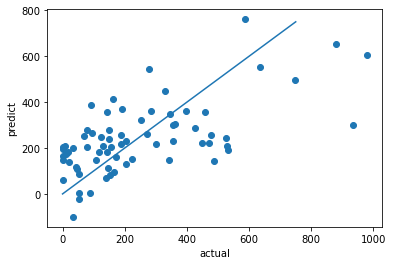

In [35]:
plt.scatter(y_valid,y_pred_Lasso)
x = np.array(range(0,800,50))
plt.plot(x,x, label='y=x')
plt.xlabel('actual')
plt.ylabel('predict')